<a href="https://colab.research.google.com/github/pandian-raja/EVA4_Session15/blob/master/All_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pandian-raja/EVA4_Session15.git


Cloning into 'EVA4_Session15'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 99 (delta 45), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (99/99), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd EVA4_Session15

In [0]:
import GetData2 as gd
import model.RGBmodel as rg
import utils as util
from torch import nn
from torch.optim.lr_scheduler import StepLR
import torch


In [5]:
train_loader = gd.importDataset()


40000
40000
40000
40000


In [0]:
device = torch.device('cuda:0')
model = rg.ResNetInspired(rg.BasicBlock, [1,1,1,1]).to(device)


In [0]:
def train(model, criterion, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, data in enumerate(train_loader):
        data["f1"] = data["f1"].to(device)
        data["f2"] = data["f2"].to(device)
        data["f3"] = data["f3"].to(device)
        data["f4"] = data["f4"].to(device)
        optim.zero_grad()
        output = model(data)
        # print(len(output))
        loss1 = criterion(output[0], data["f4"])
        # print((output[0].shape))
        # print((data["f4"].shape))
        # print((output[1].shape))
        # print((data["f3"].shape))
        
        loss2 = criterion(output[1], data["f3"])
        
        loss = 2*loss2+loss1
        loss.backward()
        optim.step()
        if batch_idx % 500 == 0:
            print(loss1)
            print(loss2)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100.*batch_idx/ len(train_loader), loss.item()))
            print('Batch ID:', batch_idx)
            # img_grid1 = tensorboardImage(output[0].detach().cpu(), nrow=2) #nrow = sqrt-bs
            # img_grid2 = tensorboardImage(output[1].detach().cpu(), nrow=2) #nrow = sqrt-bs
            # writer.add_image('Mask', img_grid1)
            # writer.add_image('Depth', img_grid2)
            show_pred(output[0].detach().cpu(), nrow=2) #nrow = sqrt-bs
            show_pred(output[1].detach().cpu(), nrow=2) #nrow = sqrt-bs
            
            # if batch_idx % 500 == 0:
            #     torch.save(model.sate_dict(), PATH/f"{batch_idx}.pth")
        


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6224, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0233, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [0/40000 (0%)]	 Loss: 0.668922
Batch ID: 0


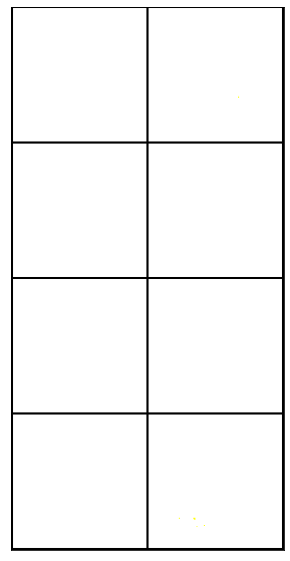

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


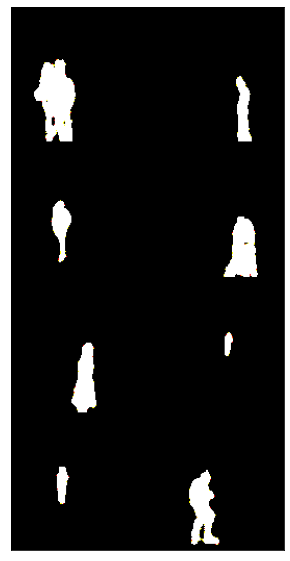

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6359, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0261, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [2000/40000 (10%)]	 Loss: 0.687992
Batch ID: 500


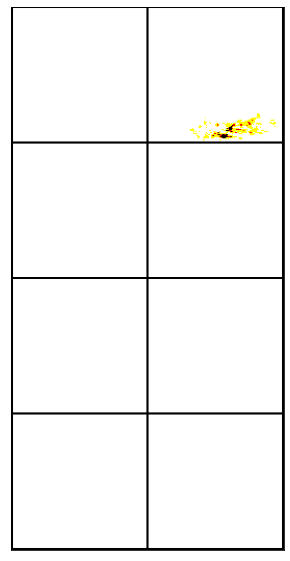

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


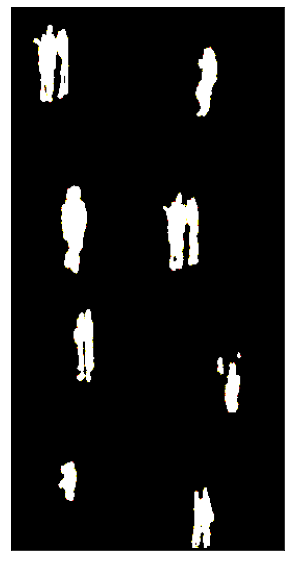

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6224, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0181, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [4000/40000 (20%)]	 Loss: 0.658648
Batch ID: 1000


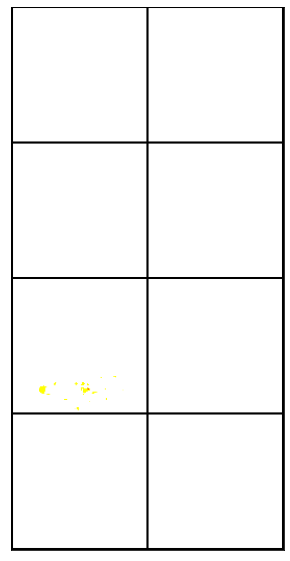

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


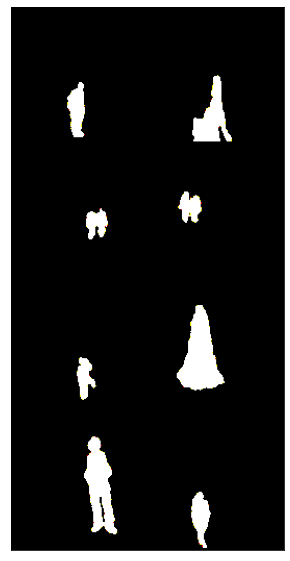

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6433, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0194, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [6000/40000 (30%)]	 Loss: 0.681998
Batch ID: 1500


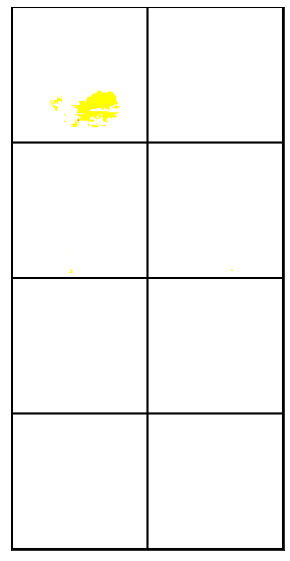

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


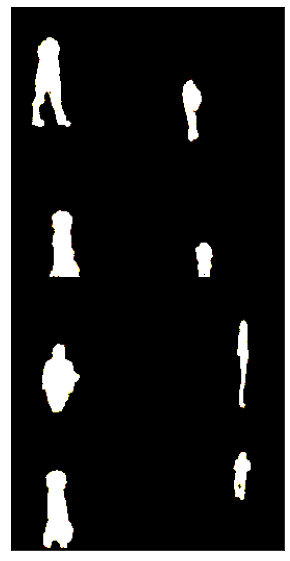

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6317, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0199, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [8000/40000 (40%)]	 Loss: 0.671484
Batch ID: 2000


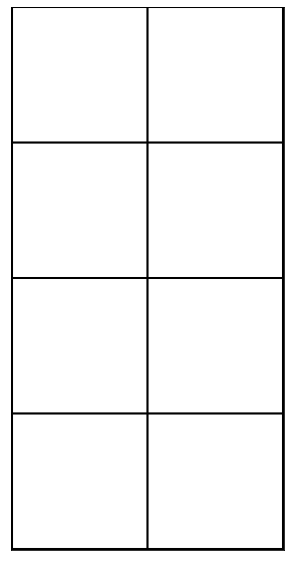

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


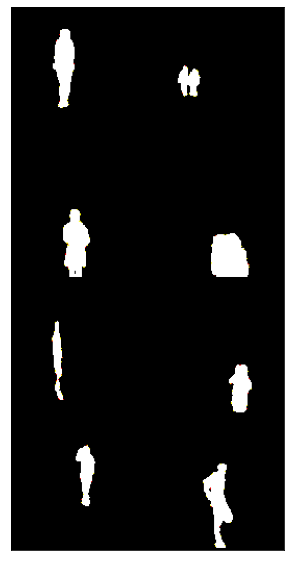

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6352, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0376, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [10000/40000 (50%)]	 Loss: 0.710446
Batch ID: 2500


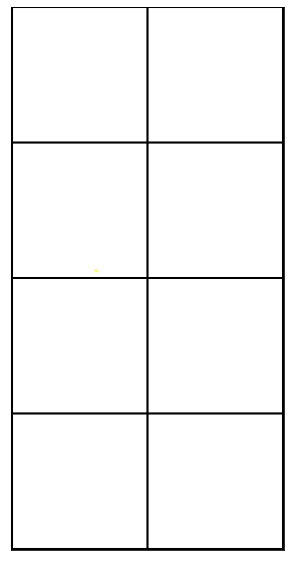

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


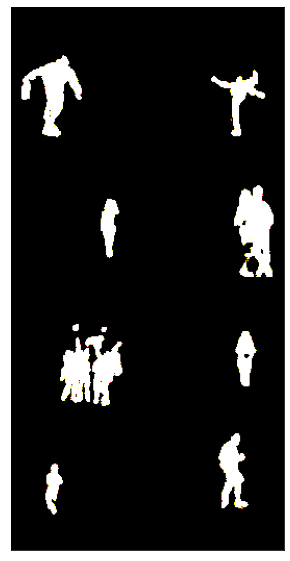

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6543, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0236, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [12000/40000 (60%)]	 Loss: 0.701542
Batch ID: 3000


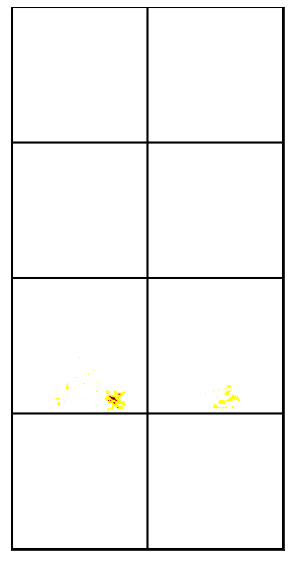

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


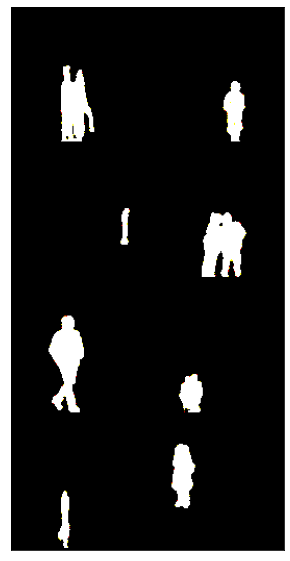

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6465, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0261, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [14000/40000 (70%)]	 Loss: 0.698669
Batch ID: 3500


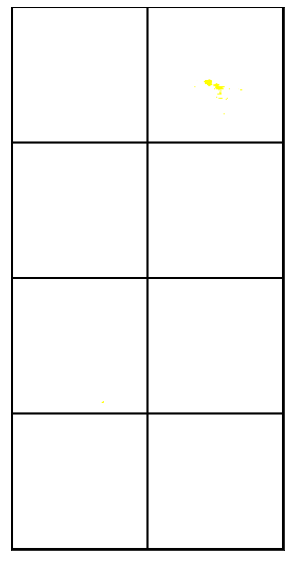

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


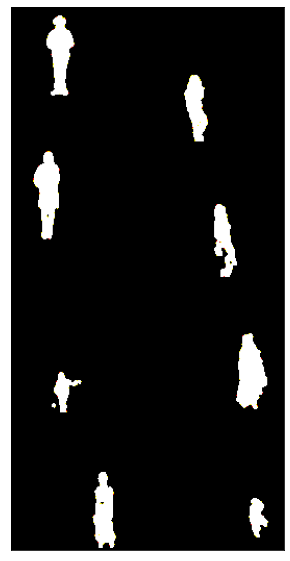

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6279, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0244, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [16000/40000 (80%)]	 Loss: 0.676627
Batch ID: 4000


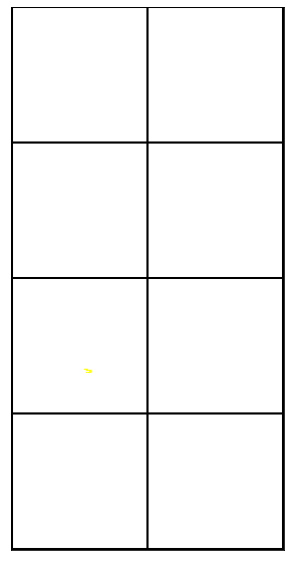

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


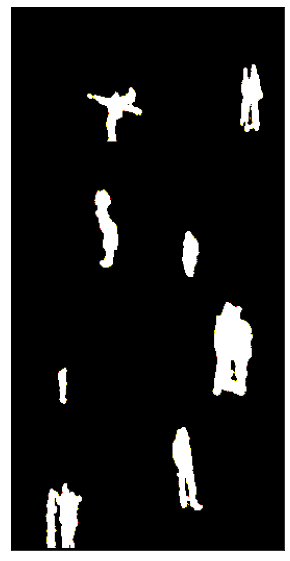

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6196, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0234, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 1 [18000/40000 (90%)]	 Loss: 0.666264
Batch ID: 4500


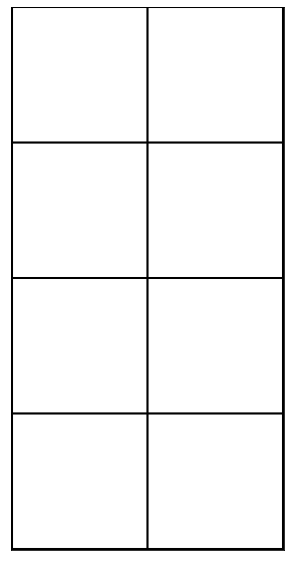

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


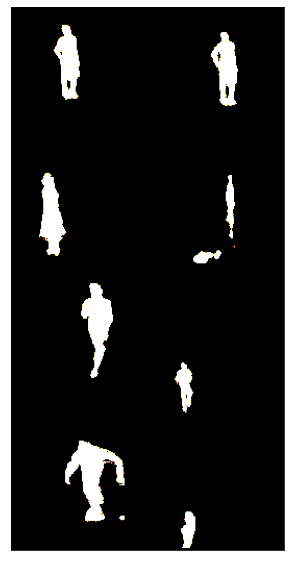

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6328, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0310, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [0/40000 (0%)]	 Loss: 0.694729
Batch ID: 0


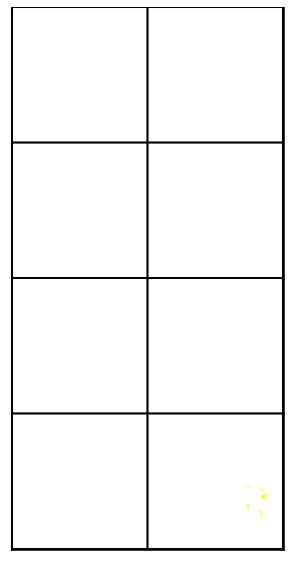

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


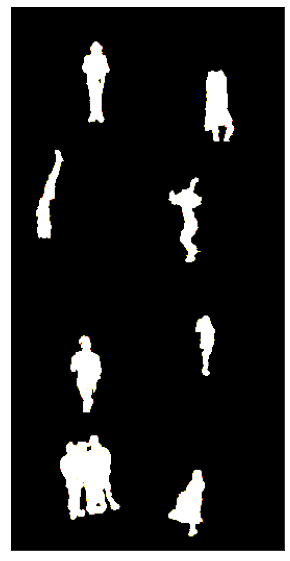

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6343, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0271, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [2000/40000 (10%)]	 Loss: 0.688479
Batch ID: 500


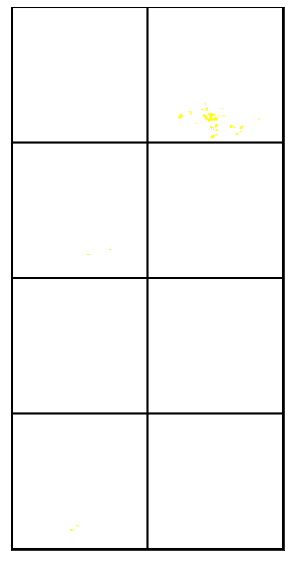

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


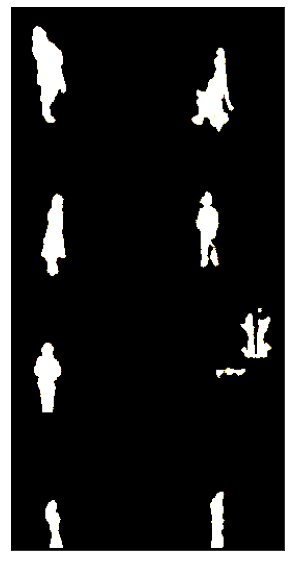

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6329, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0255, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [4000/40000 (20%)]	 Loss: 0.683981
Batch ID: 1000


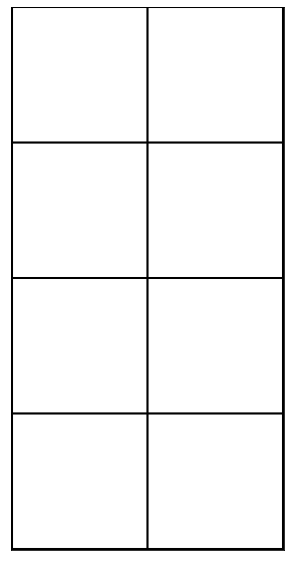

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


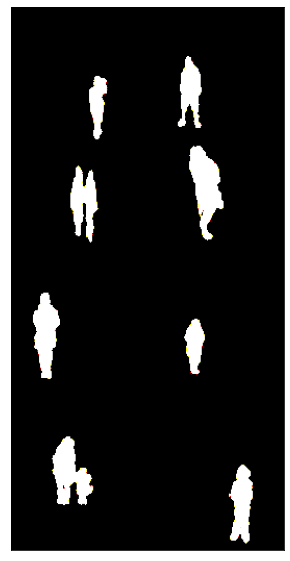

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6144, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0316, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [6000/40000 (30%)]	 Loss: 0.677510
Batch ID: 1500


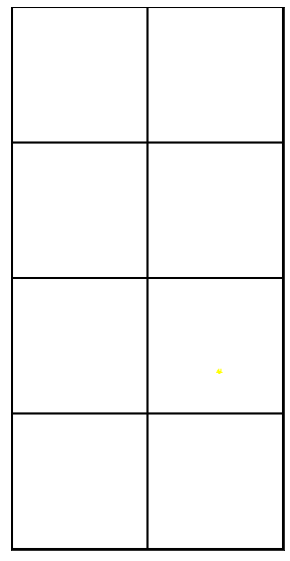

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


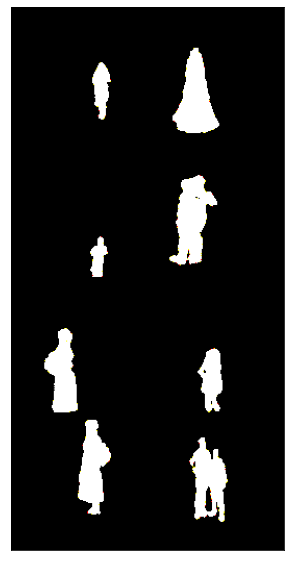

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6562, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0389, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [8000/40000 (40%)]	 Loss: 0.734001
Batch ID: 2000


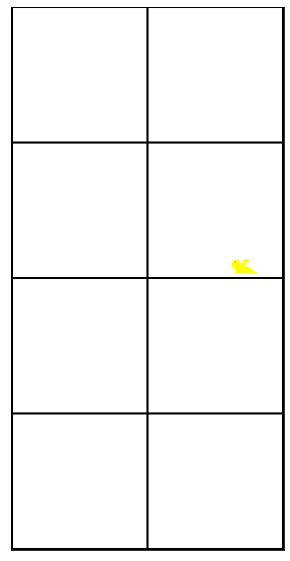

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


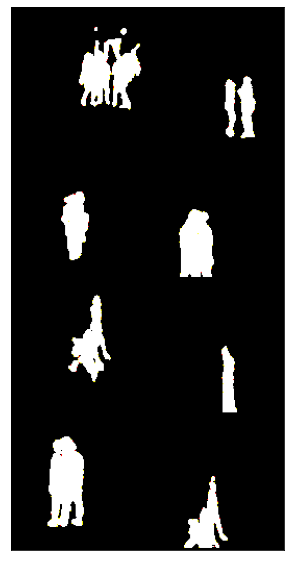

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6429, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0272, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [10000/40000 (50%)]	 Loss: 0.697241
Batch ID: 2500


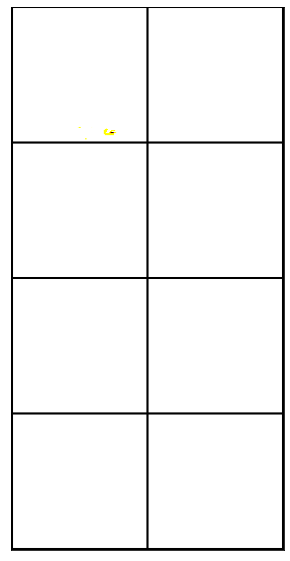

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


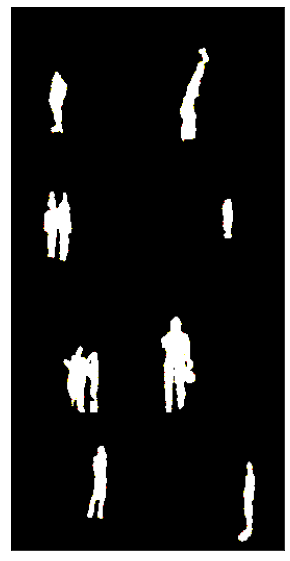

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6370, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0236, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [12000/40000 (60%)]	 Loss: 0.684212
Batch ID: 3000


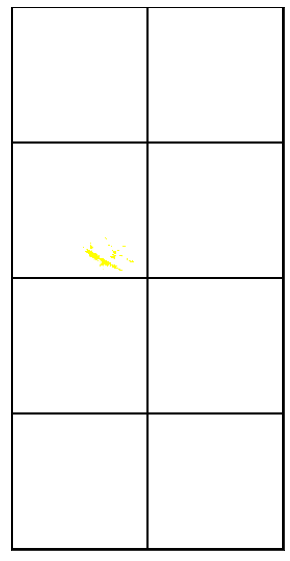

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


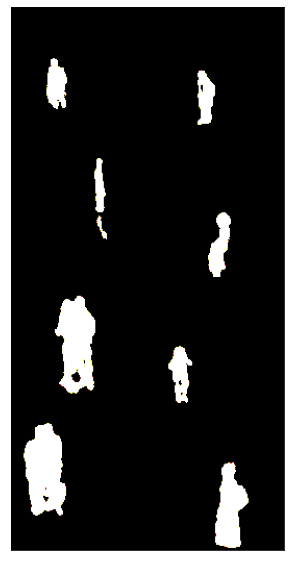

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6370, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0243, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [14000/40000 (70%)]	 Loss: 0.685626
Batch ID: 3500


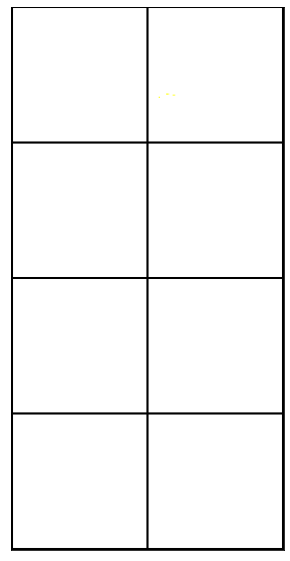

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


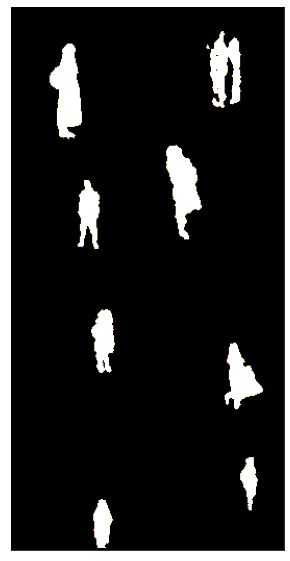

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6170, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0225, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [16000/40000 (80%)]	 Loss: 0.662052
Batch ID: 4000


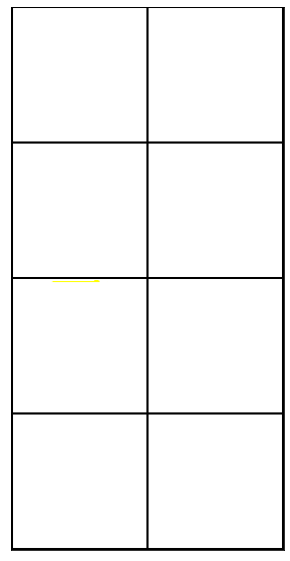

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


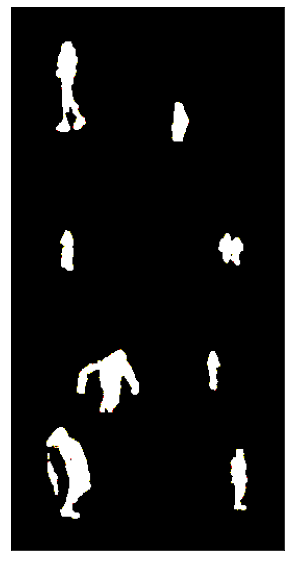

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6419, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0234, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 2 [18000/40000 (90%)]	 Loss: 0.688730
Batch ID: 4500


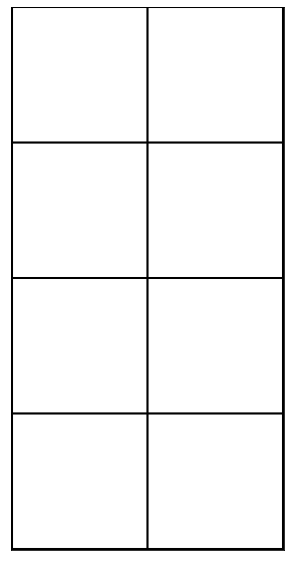

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


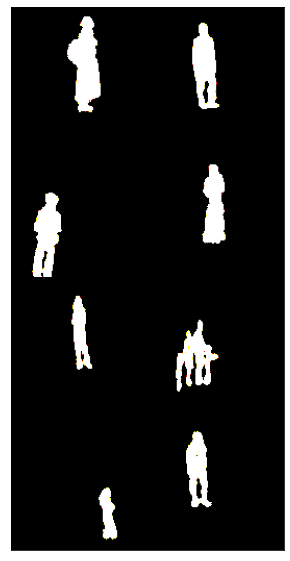

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6287, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0241, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [0/40000 (0%)]	 Loss: 0.676772
Batch ID: 0


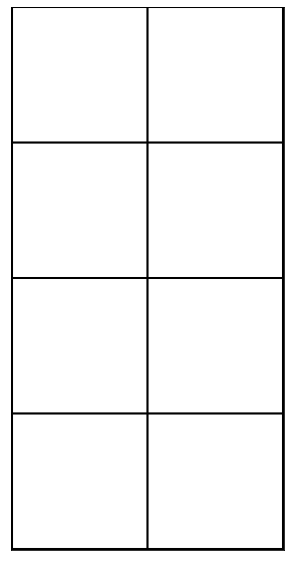

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


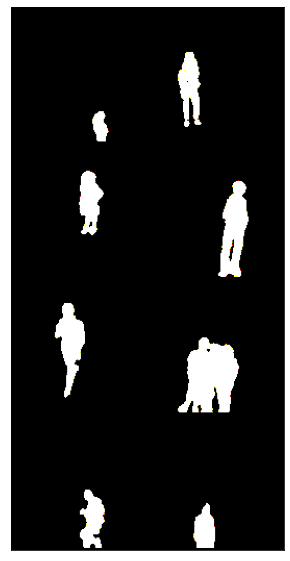

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6145, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0399, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [2000/40000 (10%)]	 Loss: 0.694322
Batch ID: 500


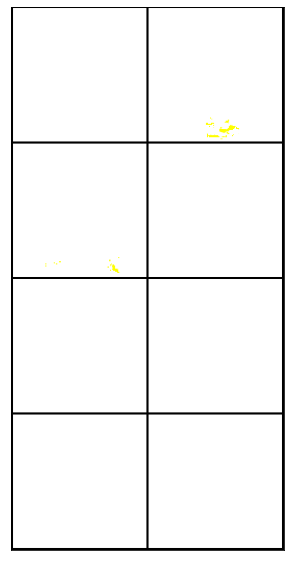

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


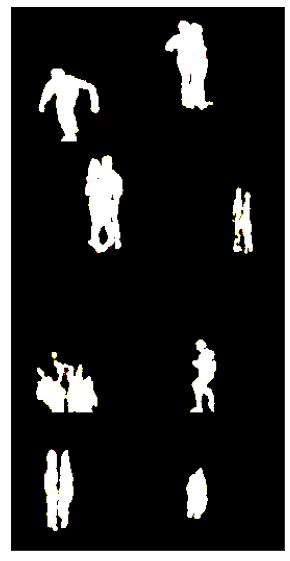

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6310, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0271, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [4000/40000 (20%)]	 Loss: 0.685273
Batch ID: 1000


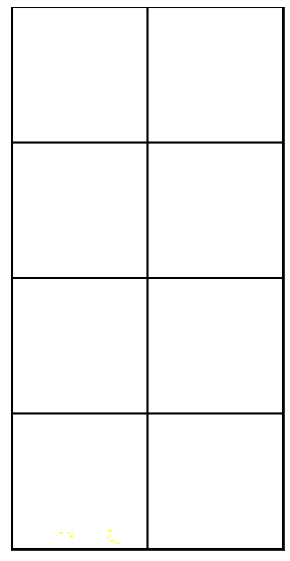

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


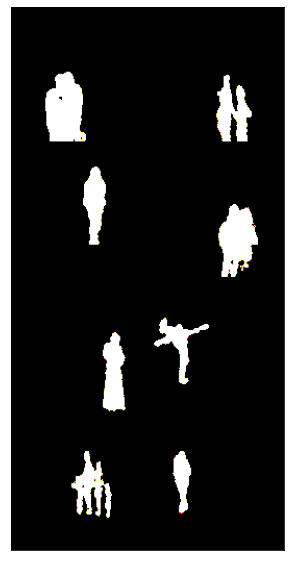

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.5850, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0321, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [6000/40000 (30%)]	 Loss: 0.649100
Batch ID: 1500


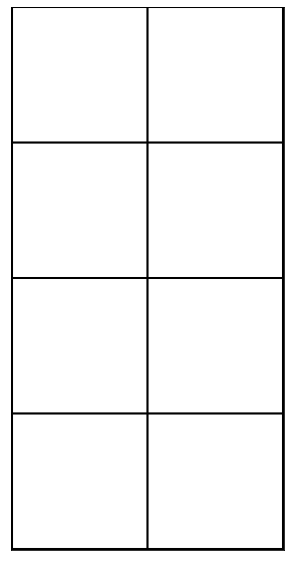

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


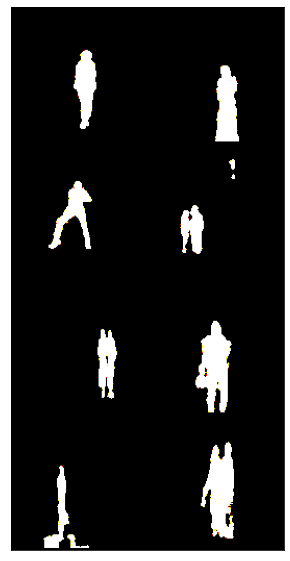

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.5961, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0205, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [8000/40000 (40%)]	 Loss: 0.637079
Batch ID: 2000


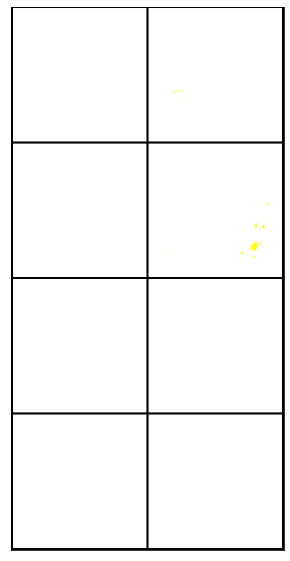

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


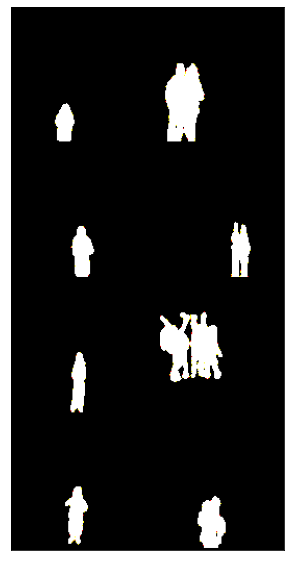

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6237, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0272, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [10000/40000 (50%)]	 Loss: 0.678179
Batch ID: 2500


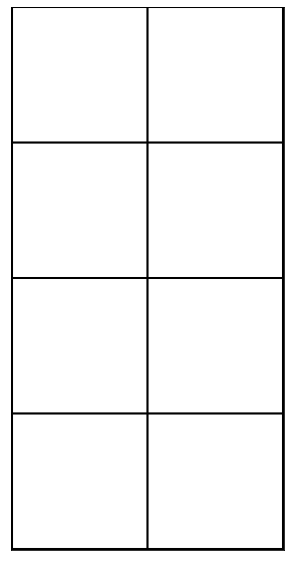

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


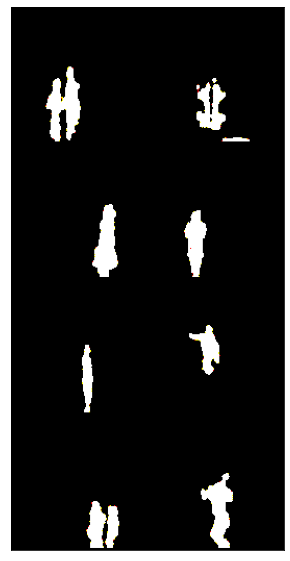

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6061, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0334, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [12000/40000 (60%)]	 Loss: 0.673014
Batch ID: 3000


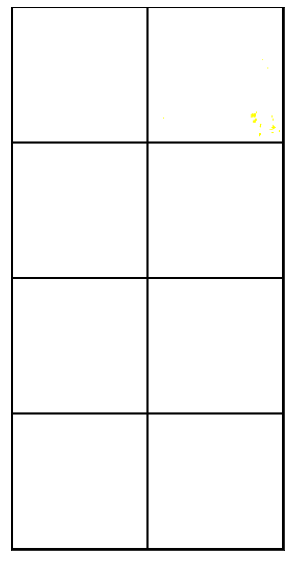

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


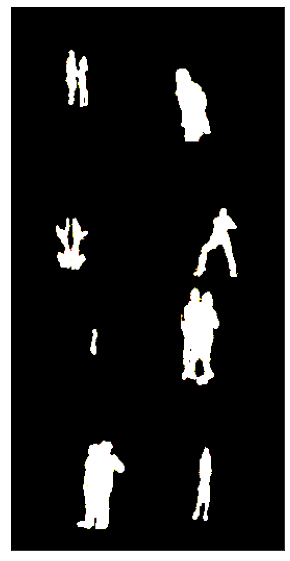

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6348, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0273, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [14000/40000 (70%)]	 Loss: 0.689421
Batch ID: 3500


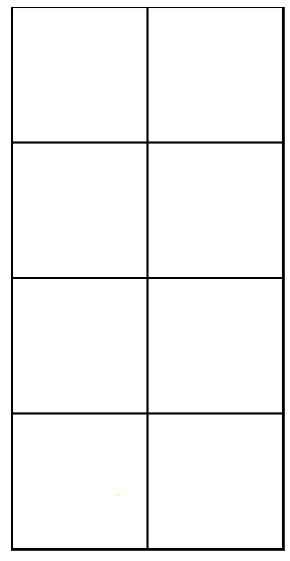

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


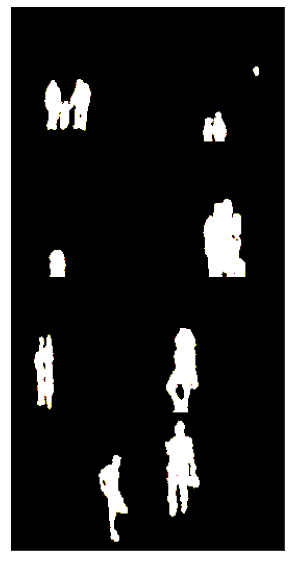

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6421, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0189, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [16000/40000 (80%)]	 Loss: 0.679878
Batch ID: 4000


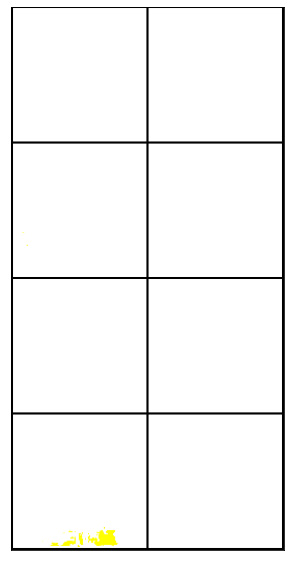

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


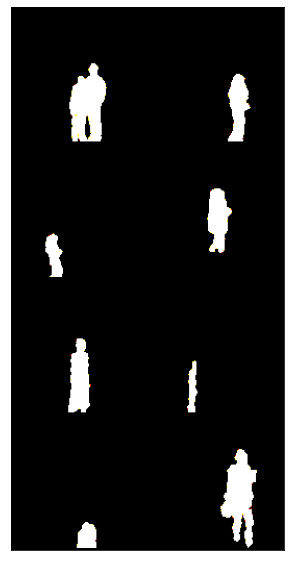

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6426, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0237, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 3 [18000/40000 (90%)]	 Loss: 0.690018
Batch ID: 4500


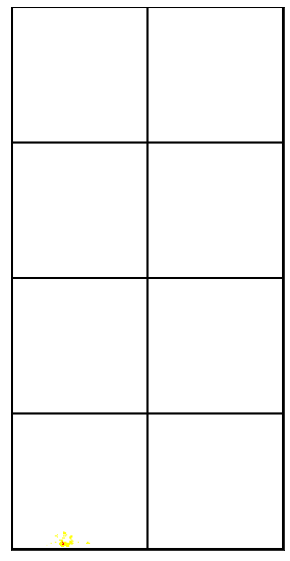

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


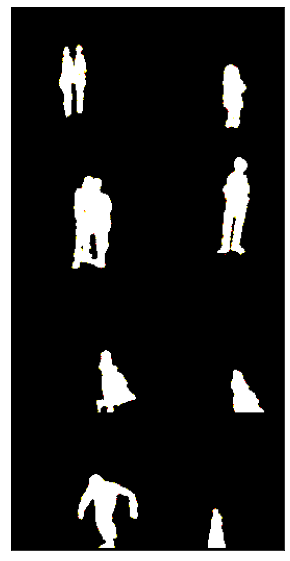

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6567, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0199, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [0/40000 (0%)]	 Loss: 0.696489
Batch ID: 0


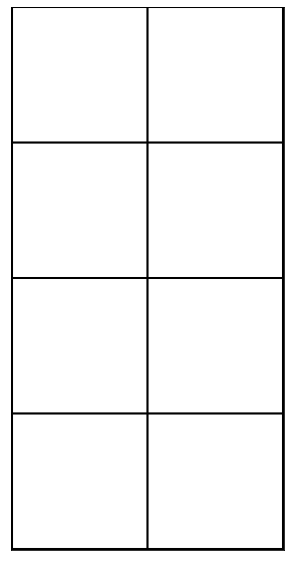

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


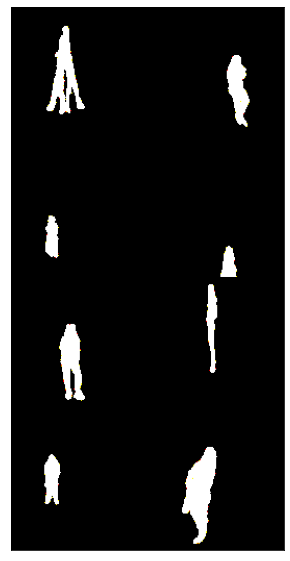

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6387, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0223, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [2000/40000 (10%)]	 Loss: 0.683321
Batch ID: 500


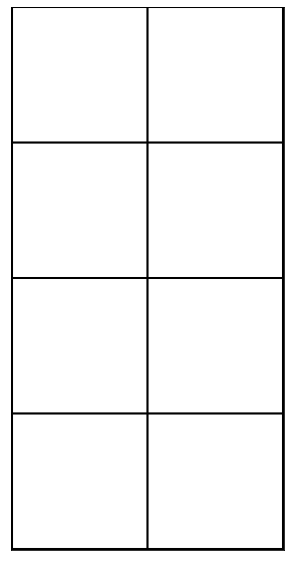

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


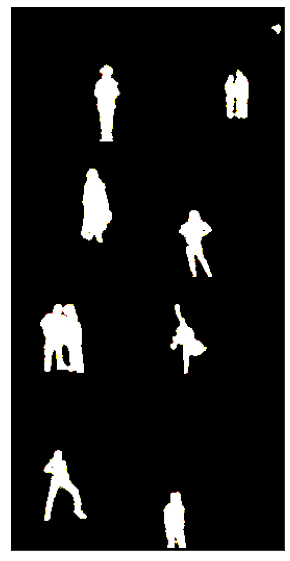

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6603, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0308, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [4000/40000 (20%)]	 Loss: 0.721953
Batch ID: 1000


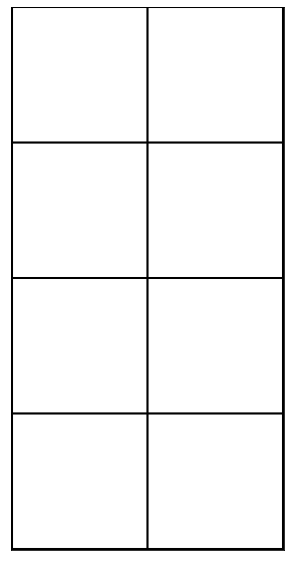

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


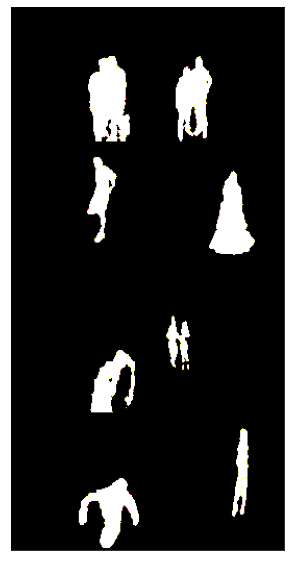

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6207, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0204, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [6000/40000 (30%)]	 Loss: 0.661568
Batch ID: 1500


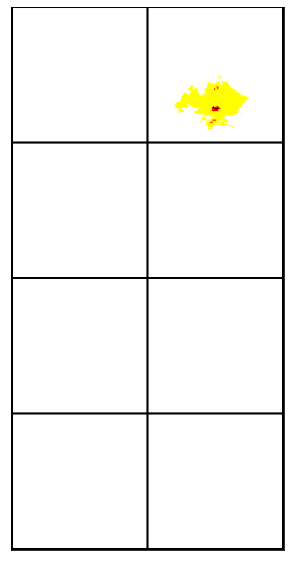

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


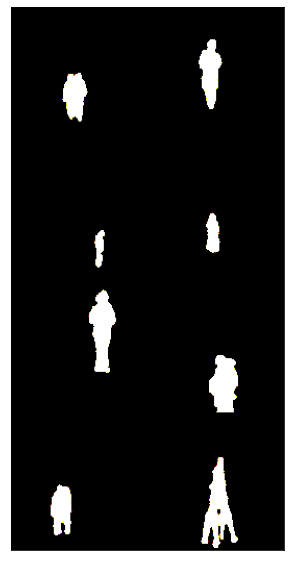

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6274, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0282, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [8000/40000 (40%)]	 Loss: 0.683869
Batch ID: 2000


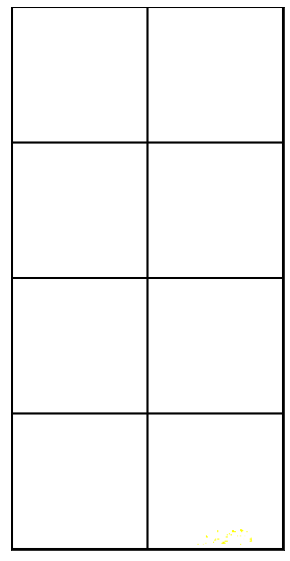

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


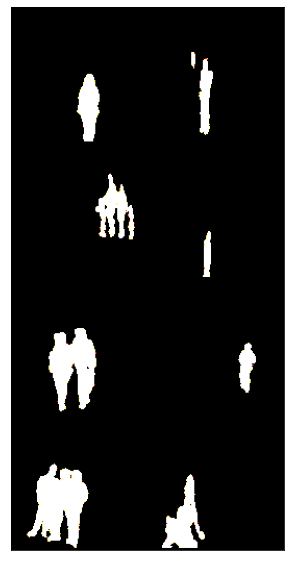

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6344, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0275, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [10000/40000 (50%)]	 Loss: 0.689276
Batch ID: 2500


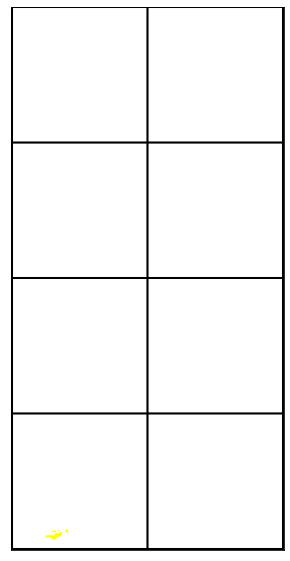

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


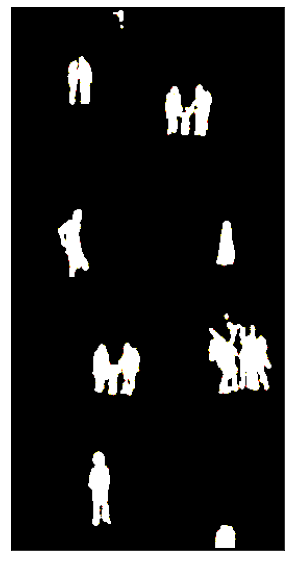

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6151, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0193, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [12000/40000 (60%)]	 Loss: 0.653642
Batch ID: 3000


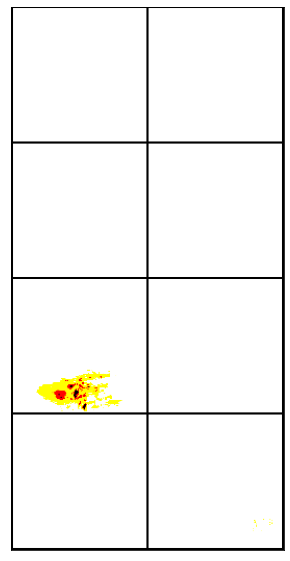

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


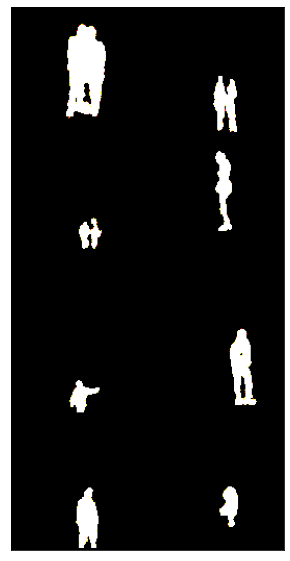

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6454, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0302, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [14000/40000 (70%)]	 Loss: 0.705790
Batch ID: 3500


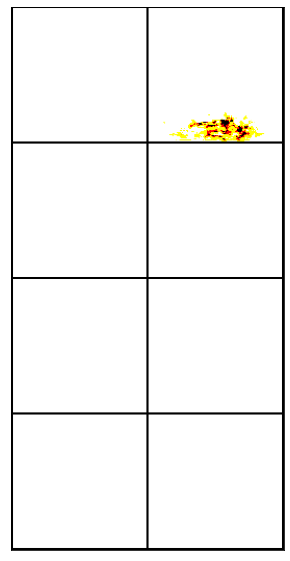

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


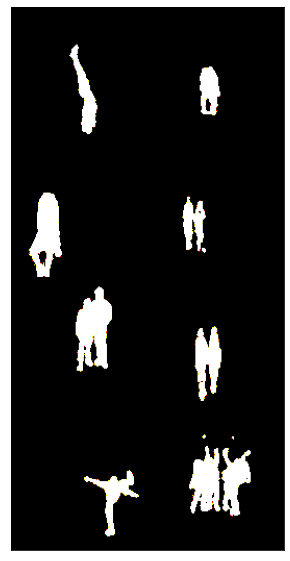

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6542, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0286, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [16000/40000 (80%)]	 Loss: 0.711465
Batch ID: 4000


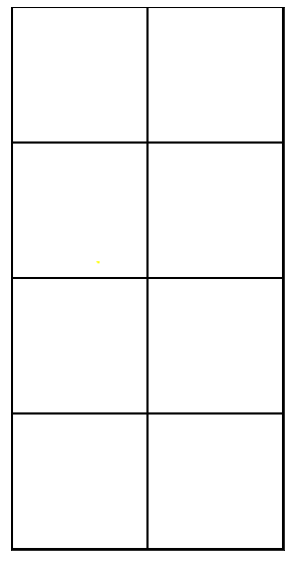

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


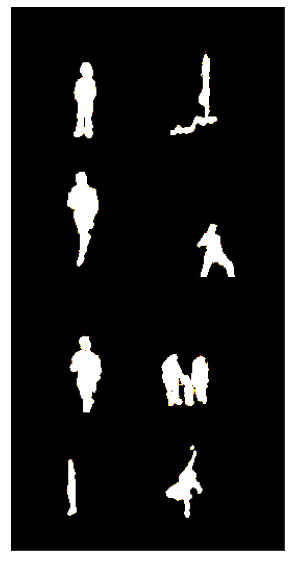

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6449, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0256, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 4 [18000/40000 (90%)]	 Loss: 0.696198
Batch ID: 4500


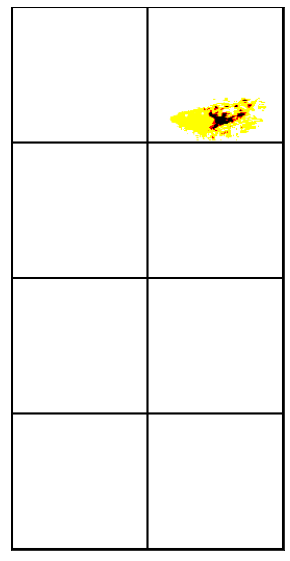

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


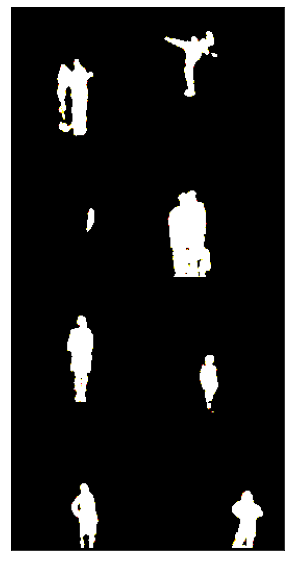

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.5975, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0247, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [0/40000 (0%)]	 Loss: 0.646856
Batch ID: 0


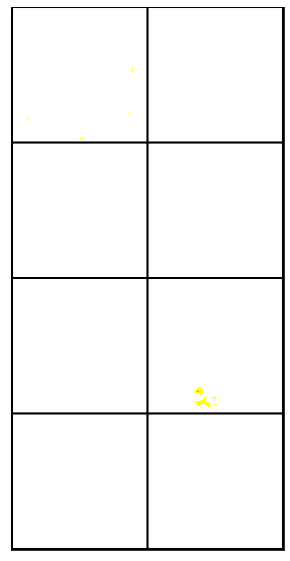

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


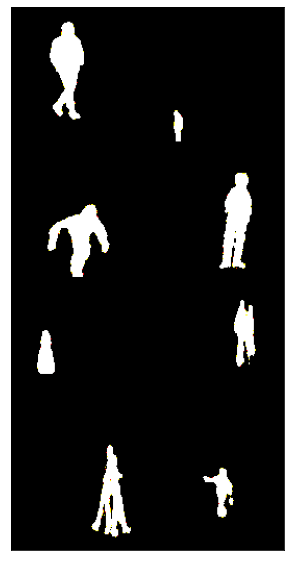

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6235, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0277, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [2000/40000 (10%)]	 Loss: 0.678871
Batch ID: 500


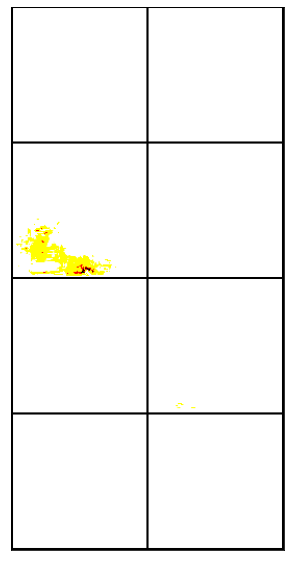

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


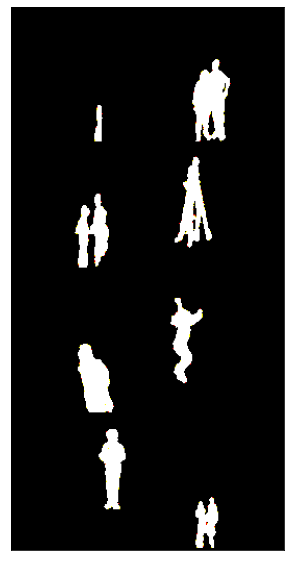

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6424, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0232, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [4000/40000 (20%)]	 Loss: 0.688783
Batch ID: 1000


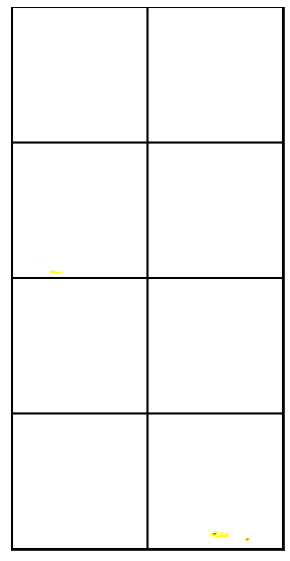

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


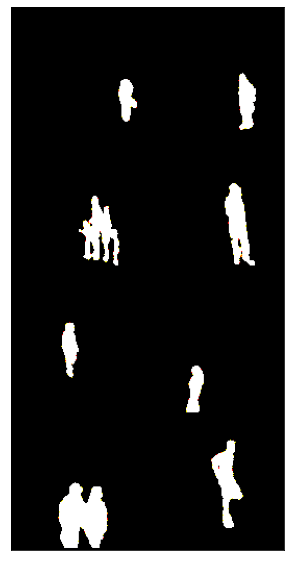

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6180, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0248, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [6000/40000 (30%)]	 Loss: 0.667657
Batch ID: 1500


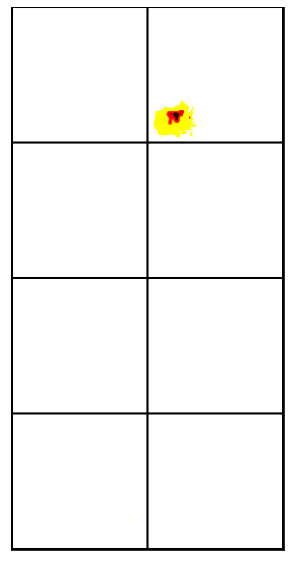

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


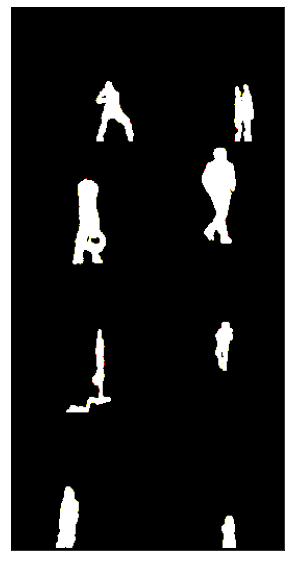

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6375, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0225, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [8000/40000 (40%)]	 Loss: 0.682475
Batch ID: 2000


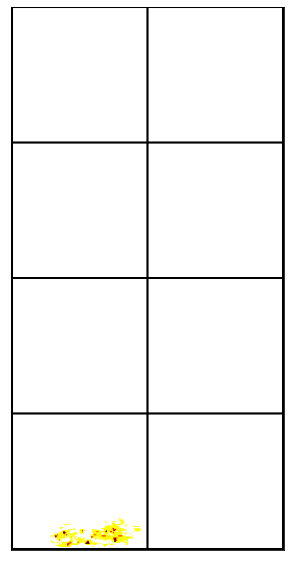

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


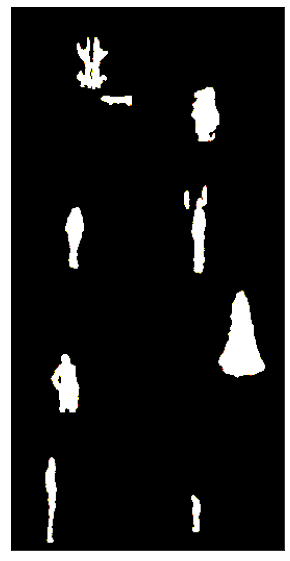

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6507, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0224, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [10000/40000 (50%)]	 Loss: 0.695579
Batch ID: 2500


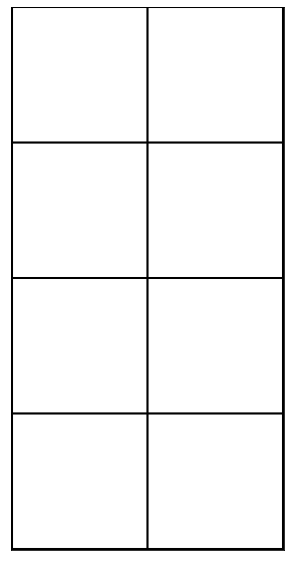

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


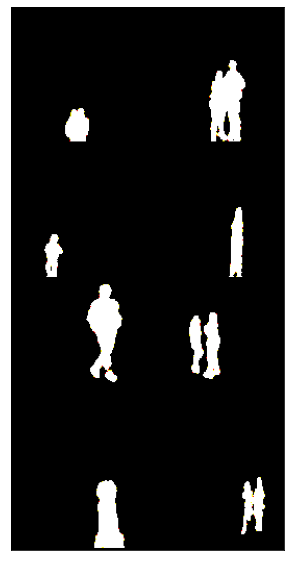

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6541, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0251, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [12000/40000 (60%)]	 Loss: 0.704249
Batch ID: 3000


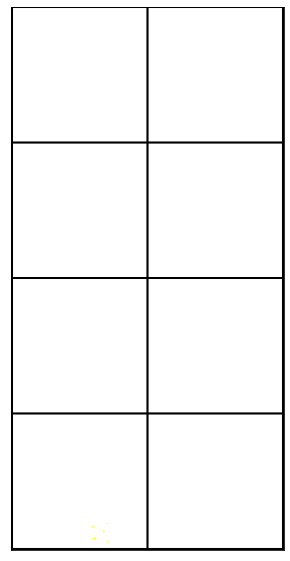

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


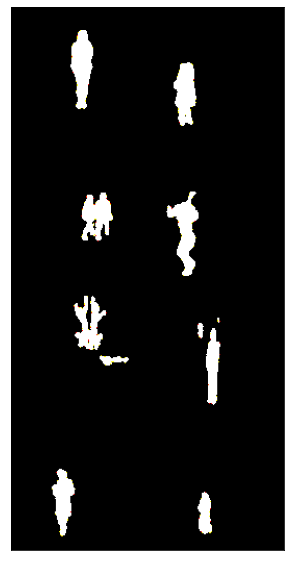

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6254, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0353, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [14000/40000 (70%)]	 Loss: 0.696059
Batch ID: 3500


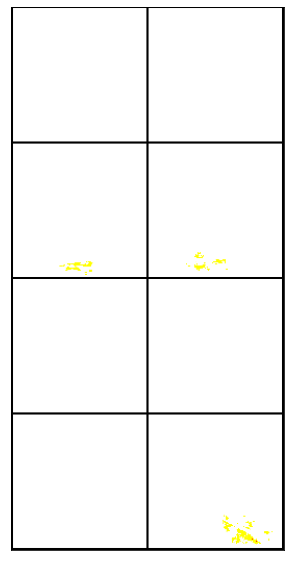

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


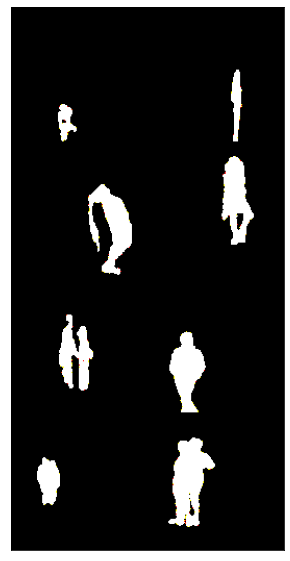

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.5960, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0236, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [16000/40000 (80%)]	 Loss: 0.643192
Batch ID: 4000


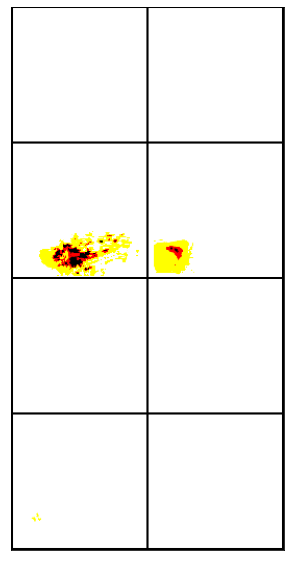

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


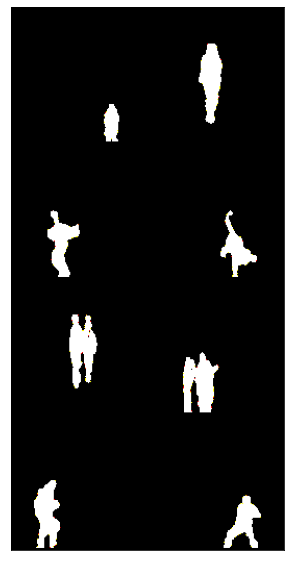

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6428, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0338, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 5 [18000/40000 (90%)]	 Loss: 0.710485
Batch ID: 4500


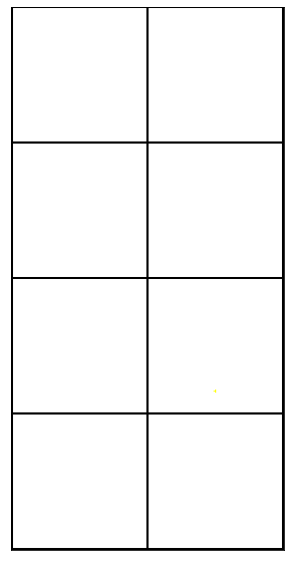

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


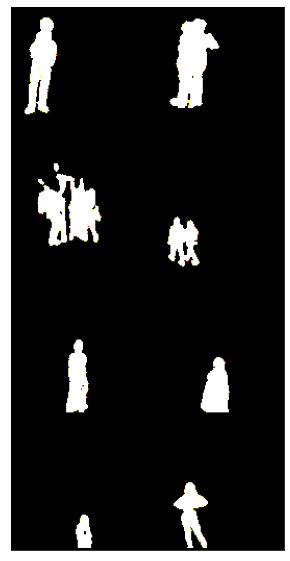

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6330, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0318, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [0/40000 (0%)]	 Loss: 0.696653
Batch ID: 0


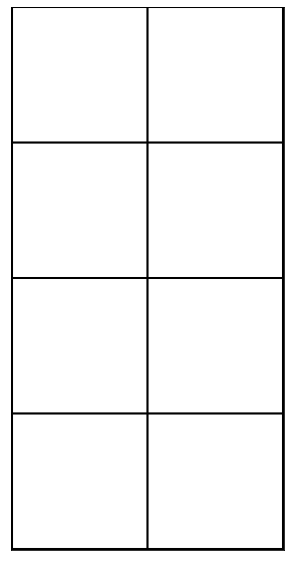

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


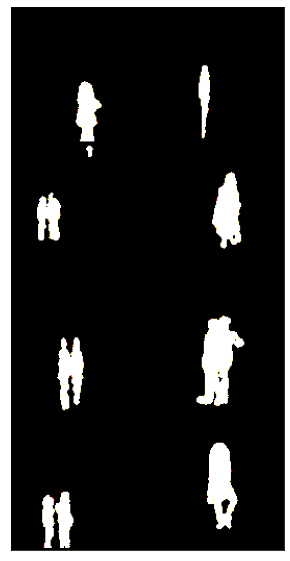

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6389, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0368, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [2000/40000 (10%)]	 Loss: 0.712572
Batch ID: 500


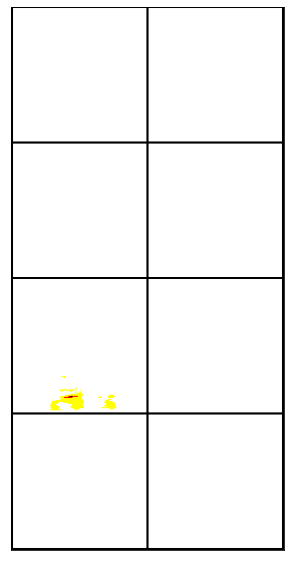

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


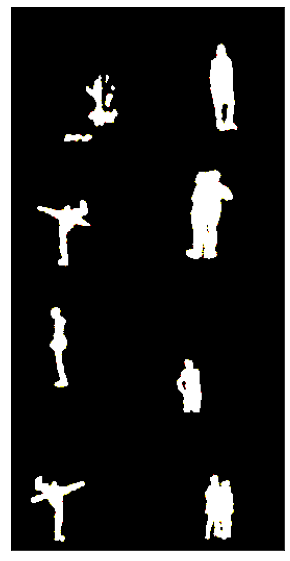

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6337, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0262, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [4000/40000 (20%)]	 Loss: 0.686197
Batch ID: 1000


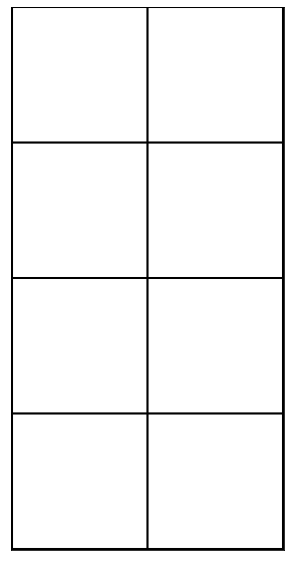

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


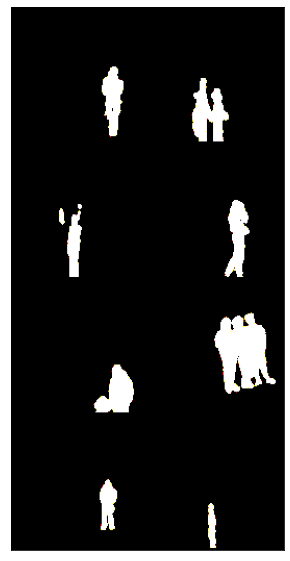

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6476, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0196, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [6000/40000 (30%)]	 Loss: 0.686835
Batch ID: 1500


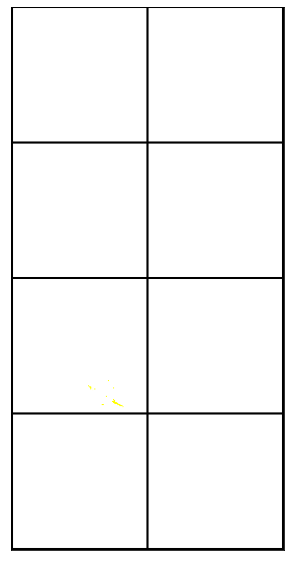

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


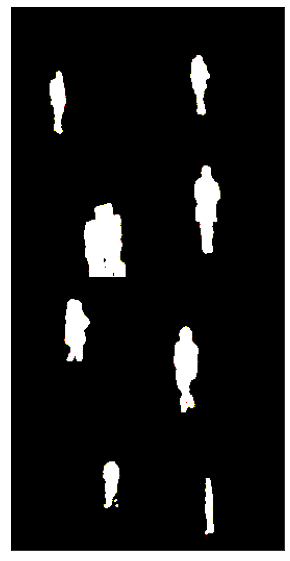

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6405, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0242, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [8000/40000 (40%)]	 Loss: 0.688830
Batch ID: 2000


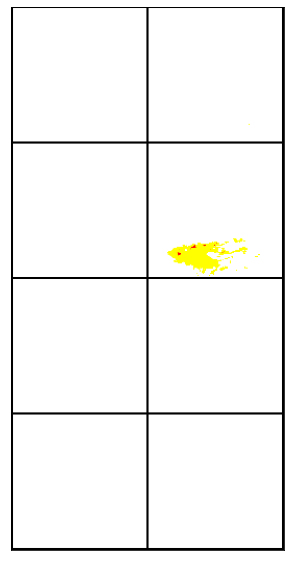

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


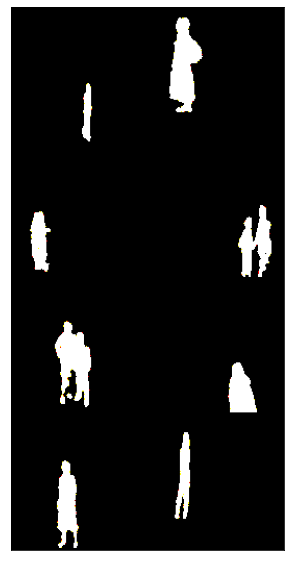

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6526, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0238, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [10000/40000 (50%)]	 Loss: 0.700207
Batch ID: 2500


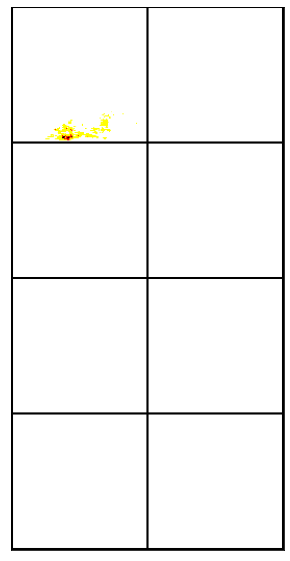

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


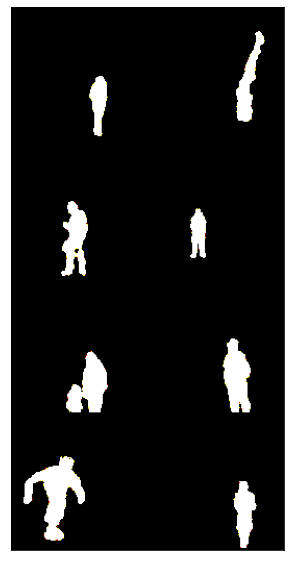

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6641, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0382, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [12000/40000 (60%)]	 Loss: 0.740468
Batch ID: 3000


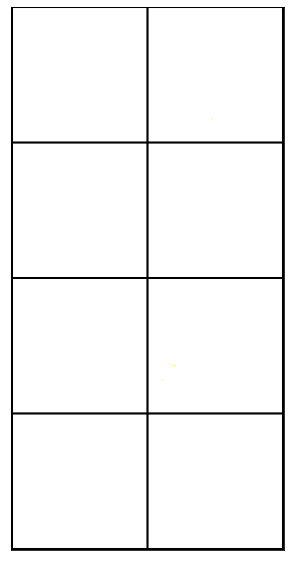

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


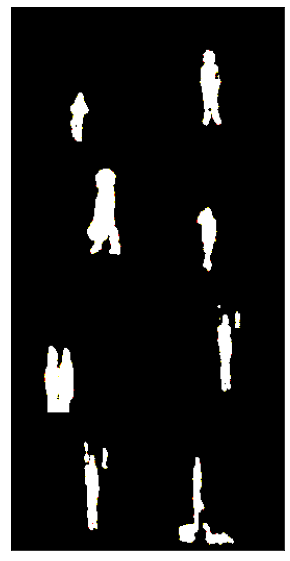

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6329, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0295, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [14000/40000 (70%)]	 Loss: 0.691860
Batch ID: 3500


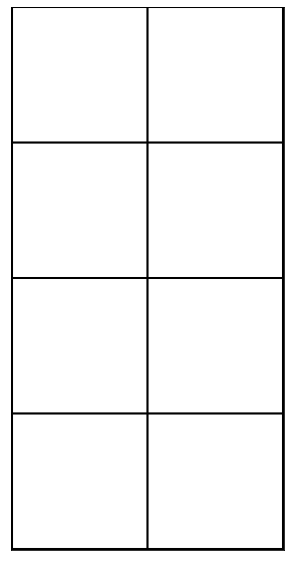

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


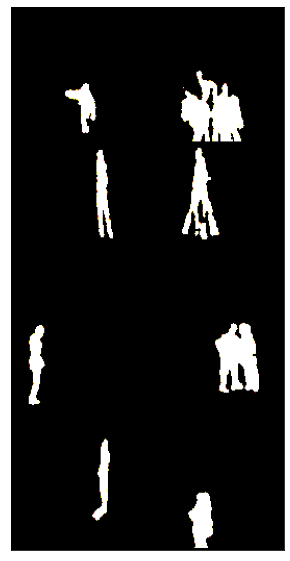

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6059, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0253, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [16000/40000 (80%)]	 Loss: 0.656596
Batch ID: 4000


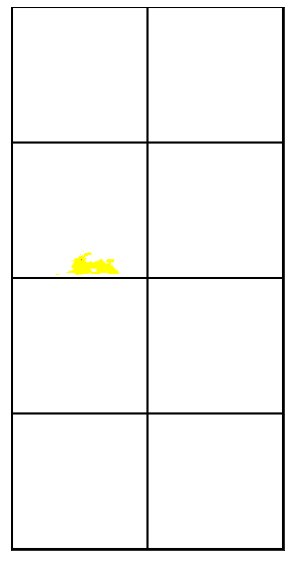

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


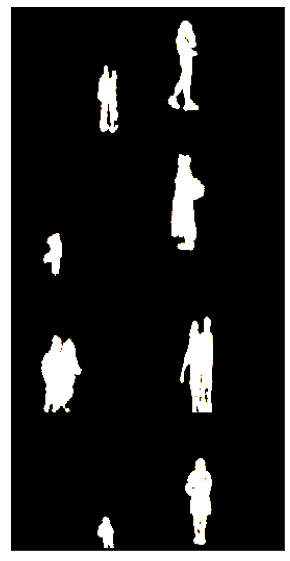

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6237, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0229, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 6 [18000/40000 (90%)]	 Loss: 0.669449
Batch ID: 4500


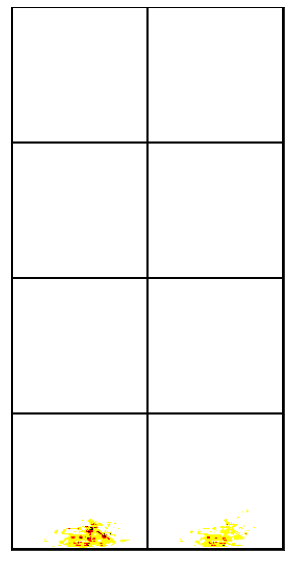

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


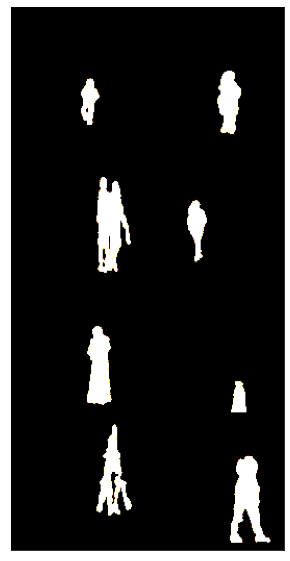

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.5966, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0303, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [0/40000 (0%)]	 Loss: 0.657282
Batch ID: 0


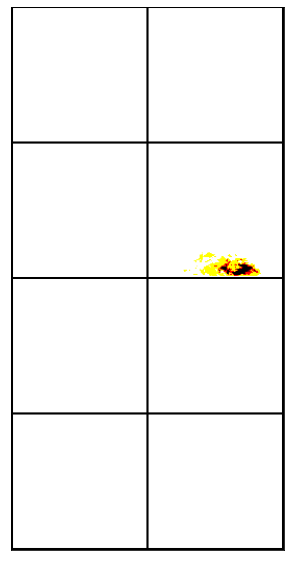

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


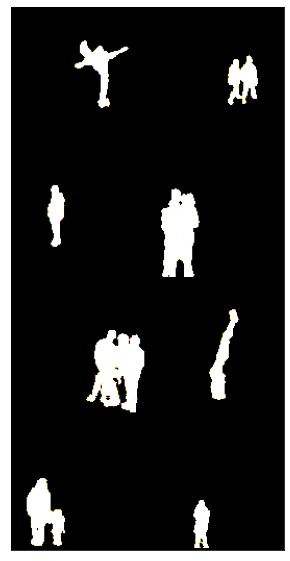

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6168, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0205, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [2000/40000 (10%)]	 Loss: 0.657851
Batch ID: 500


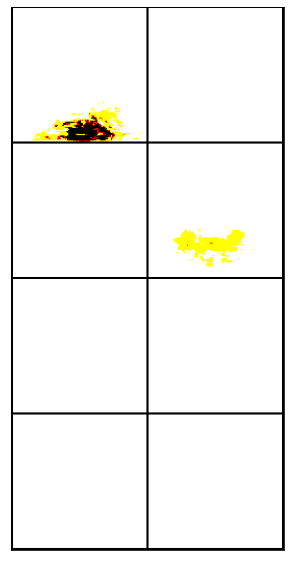

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


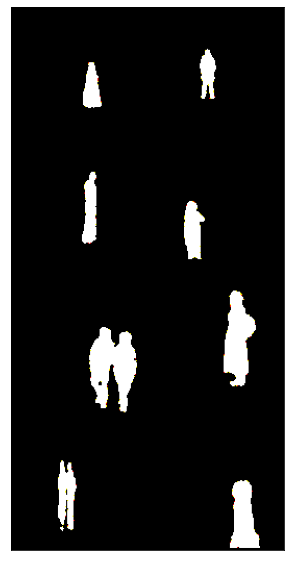

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6199, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0249, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [4000/40000 (20%)]	 Loss: 0.669738
Batch ID: 1000


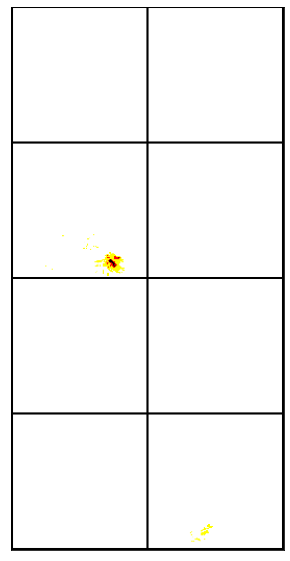

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


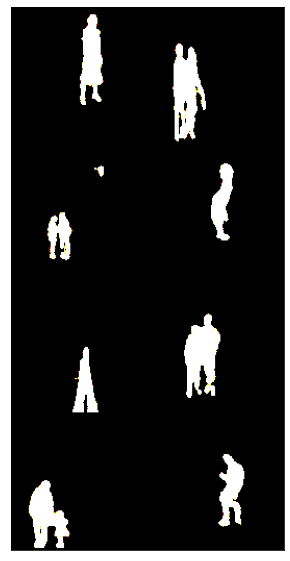

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6395, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0214, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [6000/40000 (30%)]	 Loss: 0.682230
Batch ID: 1500


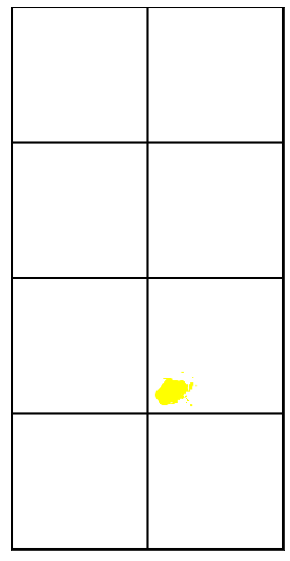

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


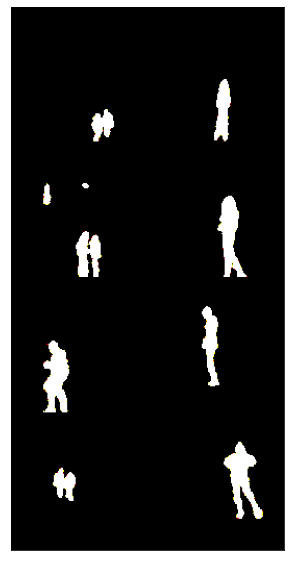

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6264, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0222, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [8000/40000 (40%)]	 Loss: 0.670719
Batch ID: 2000


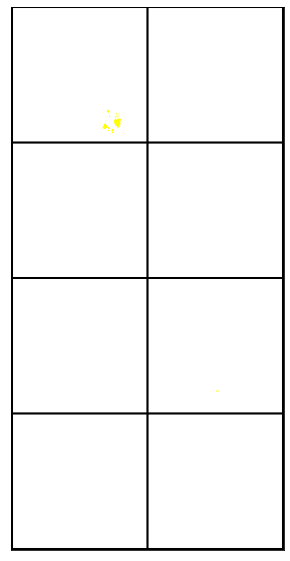

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


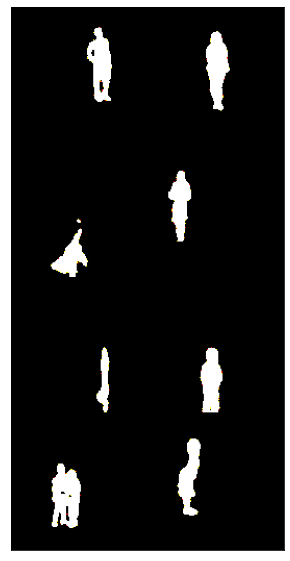

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6522, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0234, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [10000/40000 (50%)]	 Loss: 0.699056
Batch ID: 2500


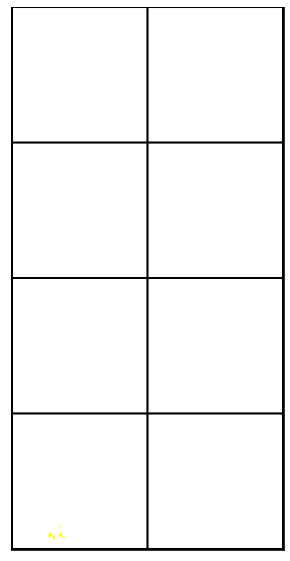

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


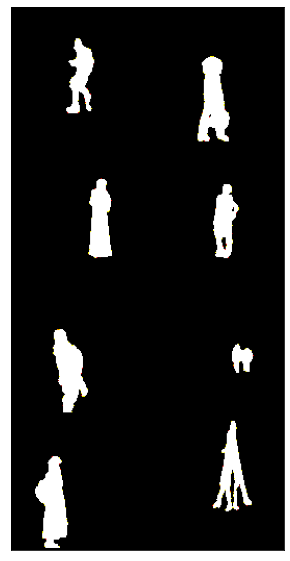

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6314, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0260, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [12000/40000 (60%)]	 Loss: 0.683338
Batch ID: 3000


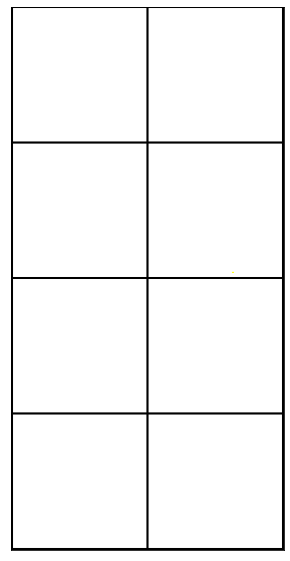

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


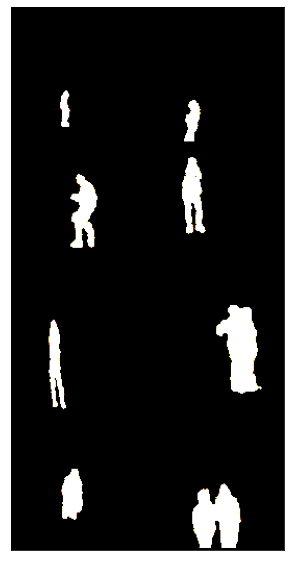

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6368, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0245, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [14000/40000 (70%)]	 Loss: 0.685698
Batch ID: 3500


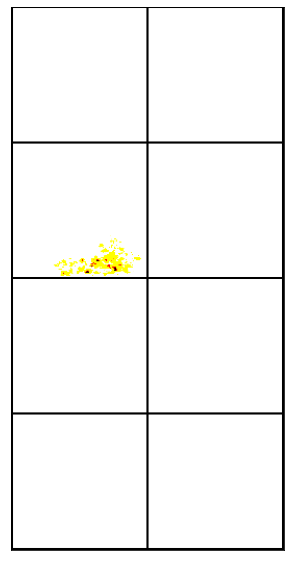

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


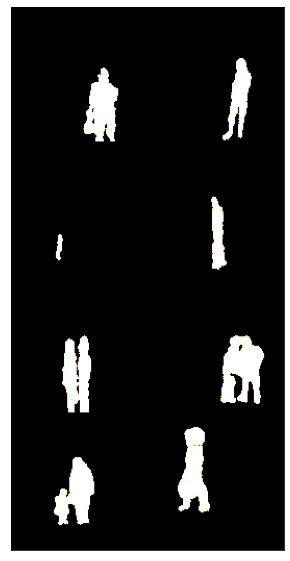

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6160, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0273, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [16000/40000 (80%)]	 Loss: 0.670619
Batch ID: 4000


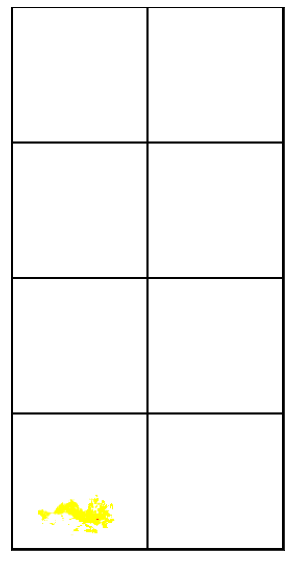

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


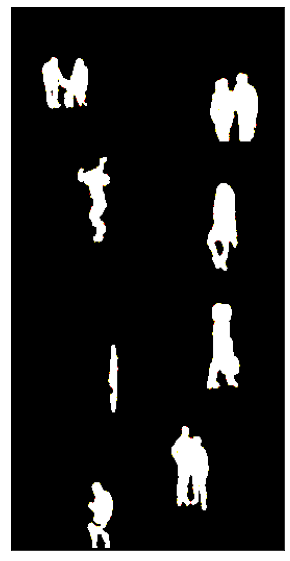

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6614, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0316, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 7 [18000/40000 (90%)]	 Loss: 0.724595
Batch ID: 4500


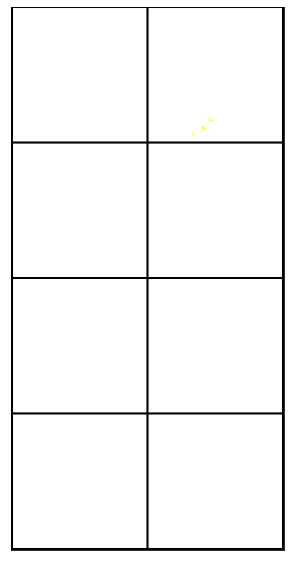

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


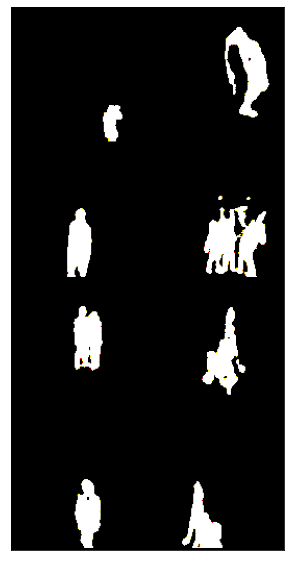

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6190, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0292, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [0/40000 (0%)]	 Loss: 0.677315
Batch ID: 0


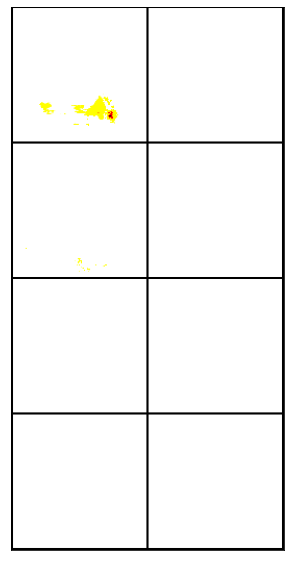

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


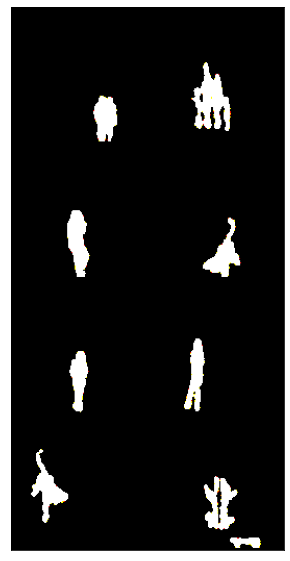

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6289, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0295, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [2000/40000 (10%)]	 Loss: 0.687889
Batch ID: 500


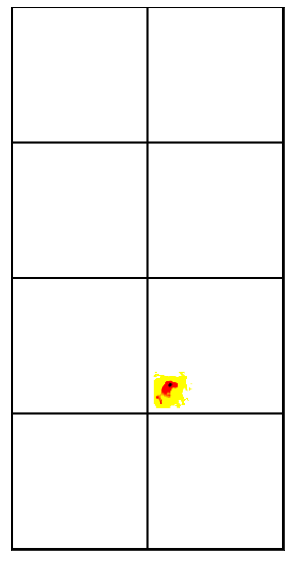

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


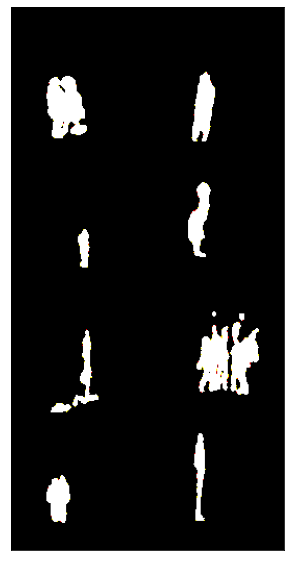

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6480, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0250, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [4000/40000 (20%)]	 Loss: 0.698079
Batch ID: 1000


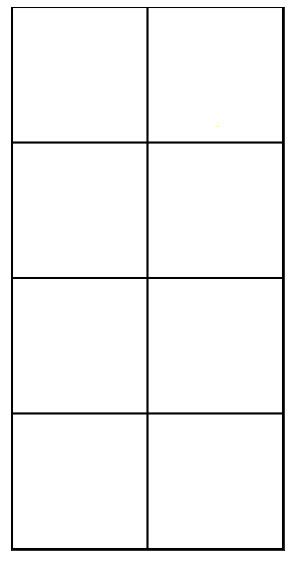

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


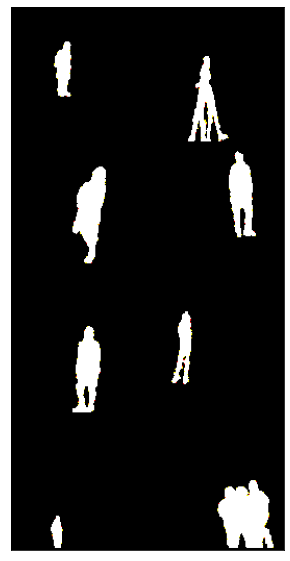

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6428, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0180, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [6000/40000 (30%)]	 Loss: 0.678709
Batch ID: 1500


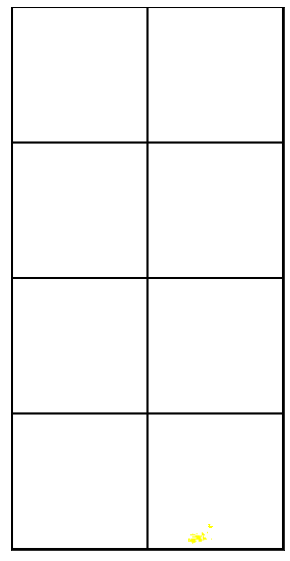

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


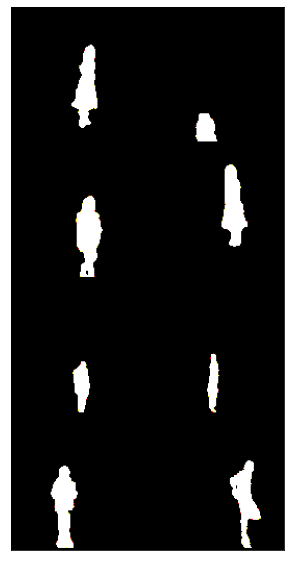

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6218, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0322, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [8000/40000 (40%)]	 Loss: 0.686220
Batch ID: 2000


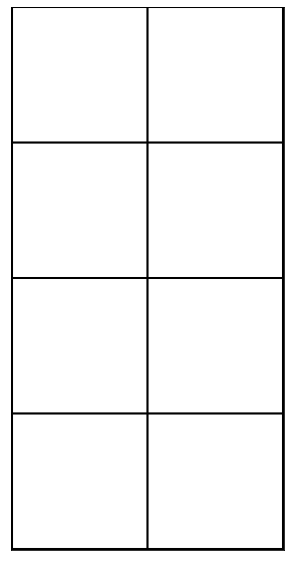

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


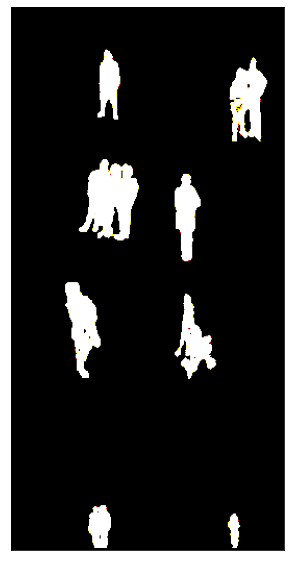

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6249, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0303, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [10000/40000 (50%)]	 Loss: 0.685588
Batch ID: 2500


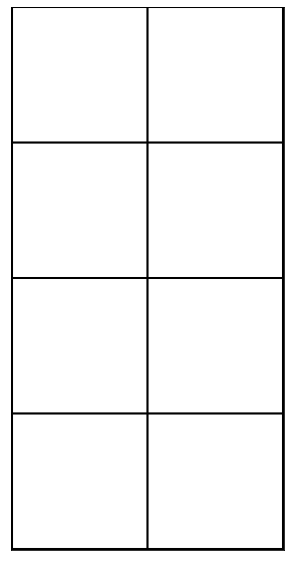

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


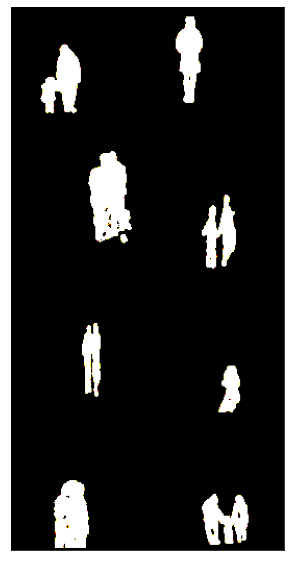

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6570, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [12000/40000 (60%)]	 Loss: 0.719758
Batch ID: 3000


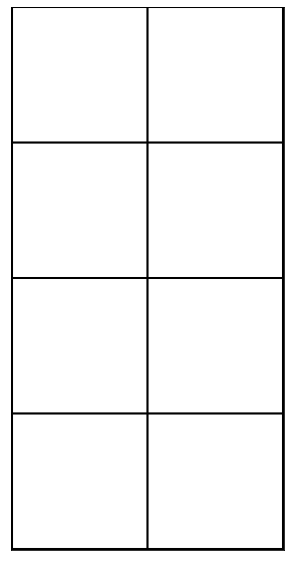

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


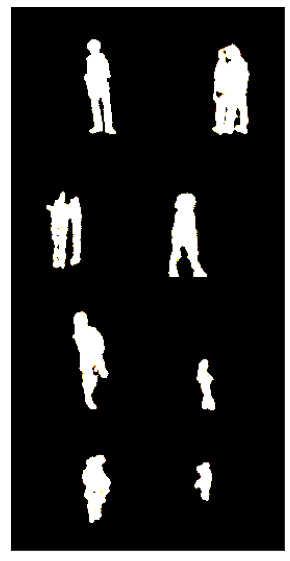

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6391, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0460, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [14000/40000 (70%)]	 Loss: 0.731181
Batch ID: 3500


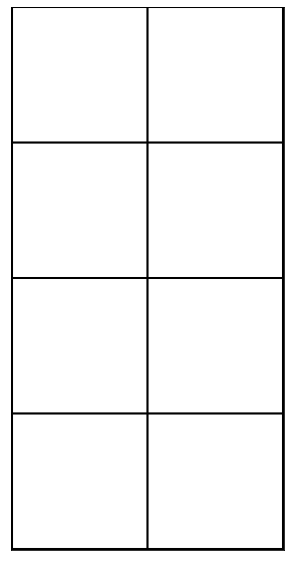

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


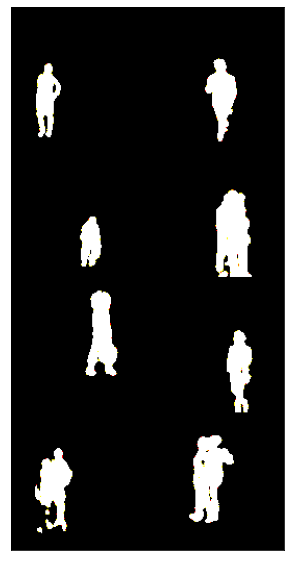

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6235, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0246, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [16000/40000 (80%)]	 Loss: 0.672685
Batch ID: 4000


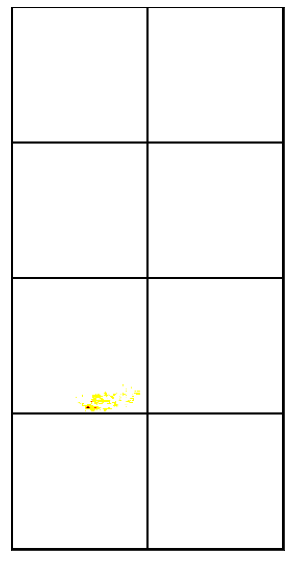

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


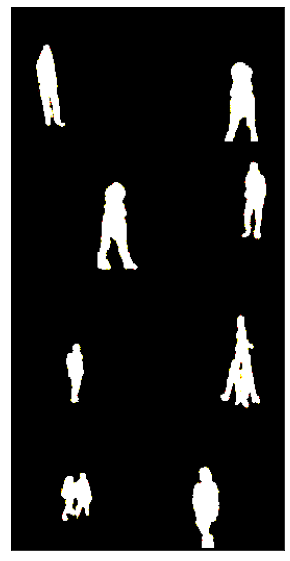

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6382, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0222, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 8 [18000/40000 (90%)]	 Loss: 0.682603
Batch ID: 4500


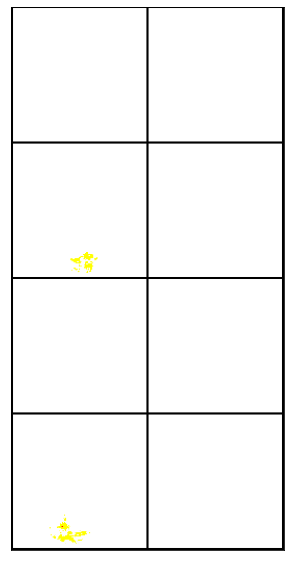

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


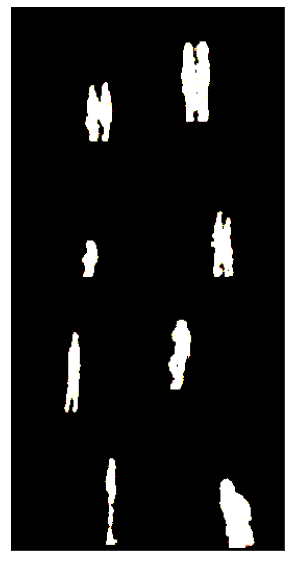

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6036, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0228, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [0/40000 (0%)]	 Loss: 0.649202
Batch ID: 0


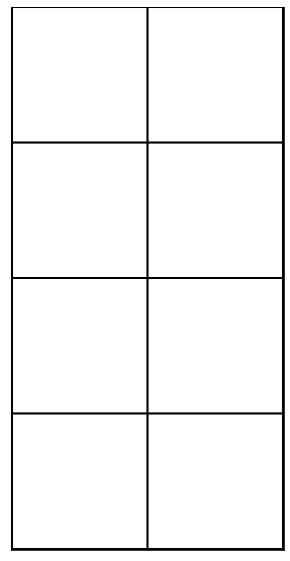

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


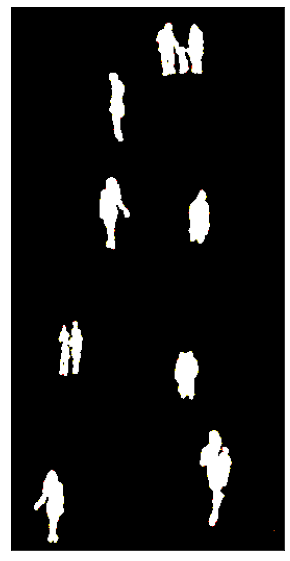

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6321, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0298, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [2000/40000 (10%)]	 Loss: 0.691670
Batch ID: 500


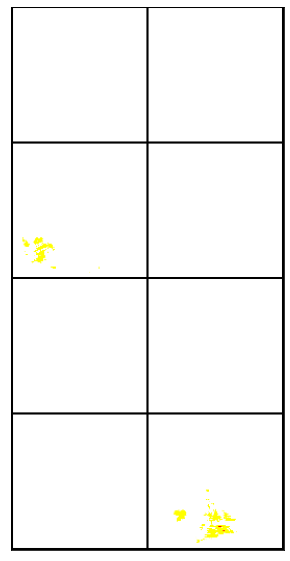

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


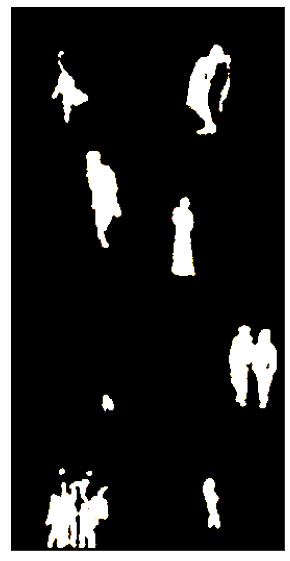

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6330, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0302, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [4000/40000 (20%)]	 Loss: 0.693333
Batch ID: 1000


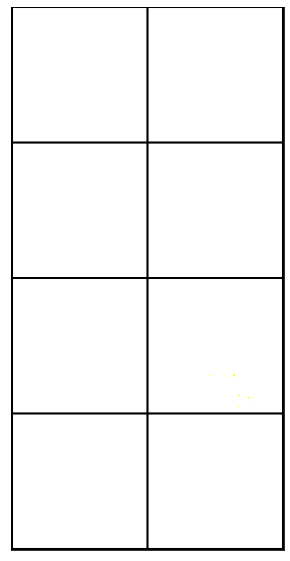

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


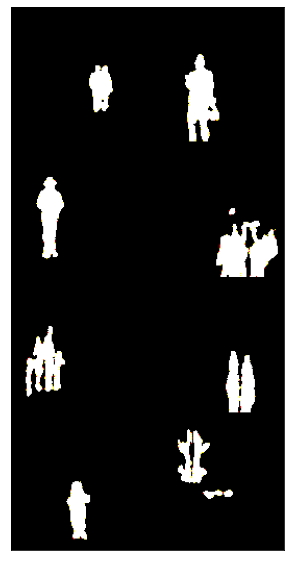

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6326, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0330, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [6000/40000 (30%)]	 Loss: 0.698469
Batch ID: 1500


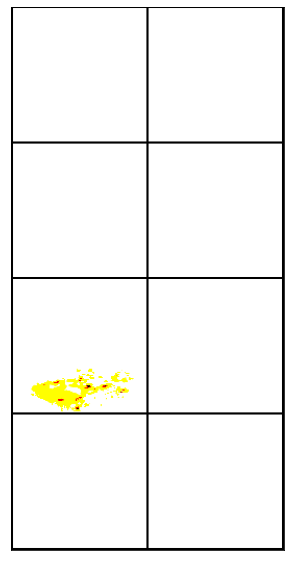

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


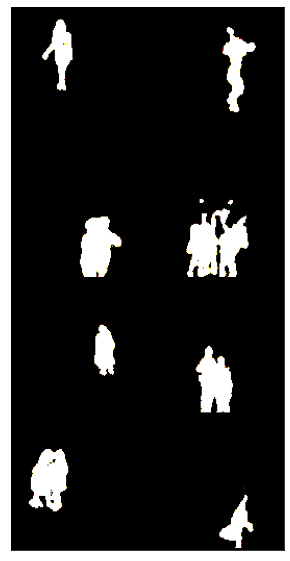

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6345, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0363, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [8000/40000 (40%)]	 Loss: 0.707136
Batch ID: 2000


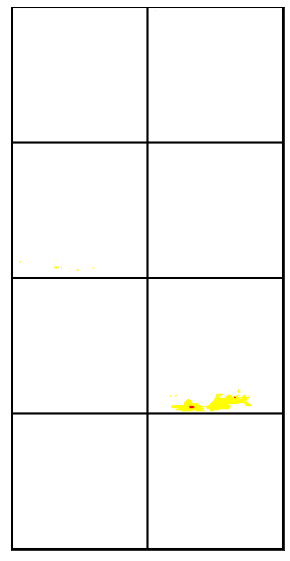

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


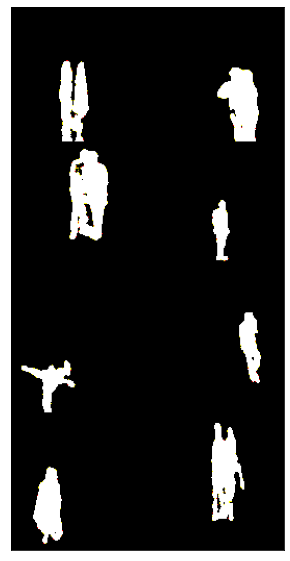

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6217, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0243, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [10000/40000 (50%)]	 Loss: 0.670275
Batch ID: 2500


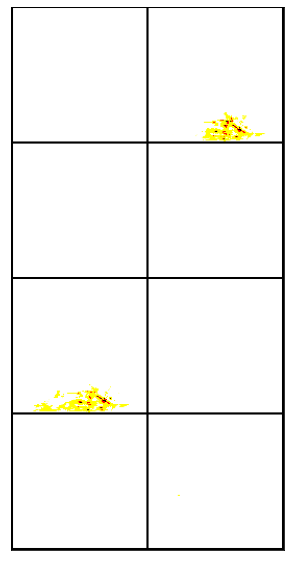

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


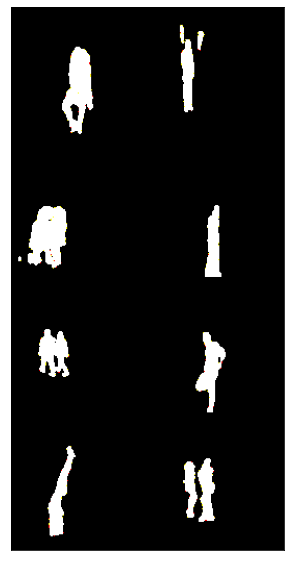

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6214, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0250, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [12000/40000 (60%)]	 Loss: 0.671358
Batch ID: 3000


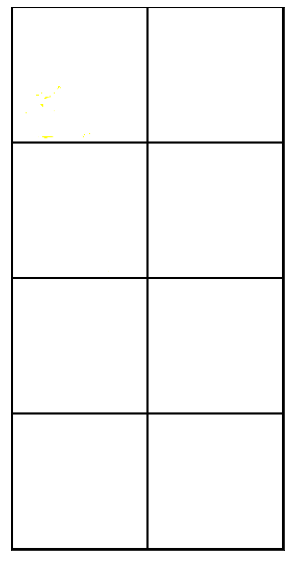

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


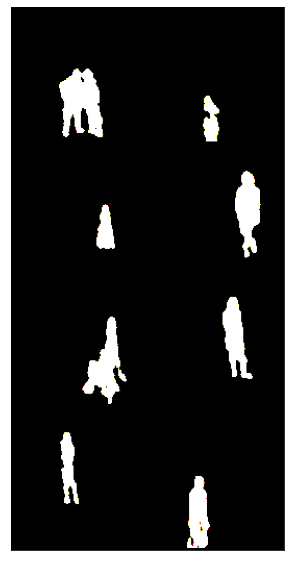

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6324, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0216, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [14000/40000 (70%)]	 Loss: 0.675601
Batch ID: 3500


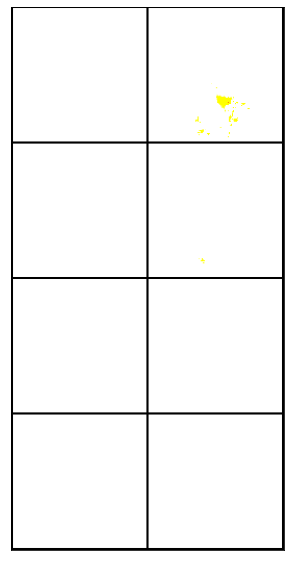

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


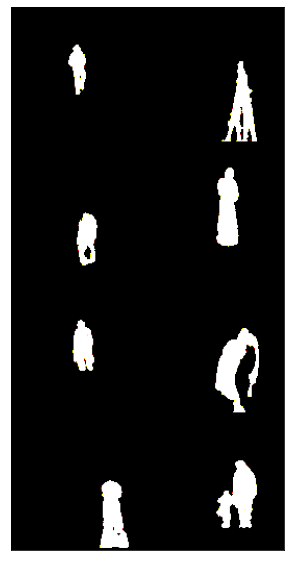

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6063, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0221, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [16000/40000 (80%)]	 Loss: 0.650557
Batch ID: 4000


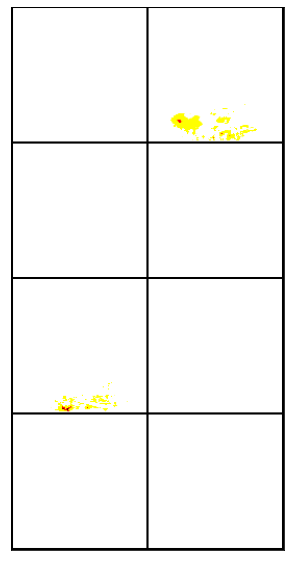

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


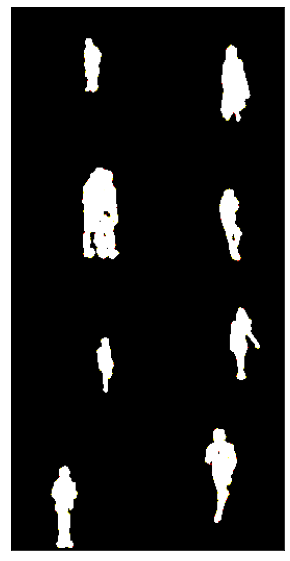

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.6262, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0283, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
Train Epoch: 9 [18000/40000 (90%)]	 Loss: 0.682717
Batch ID: 4500


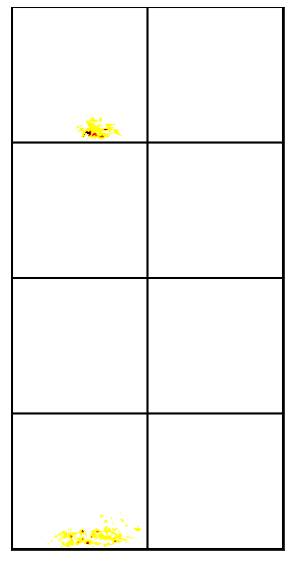

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


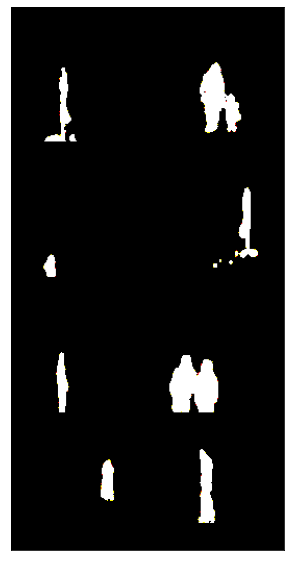

In [27]:
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
criterion = nn.BCEWithLogitsLoss()
# criterion = nn.MSELoss()
scheduler = StepLR(optim, step_size=2, gamma=0.01)
for epoch in range(1, 10):
    train(model, criterion, device, train_loader, optim, epoch)
    scheduler.step()